<a href="https://colab.research.google.com/github/Kaustubh-Amare/-EDA_CAPSTONE_Playstore_-_Userdata/blob/main/Cardiovascular_Risk_Prediction_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1** - Kaustubh K Amare
##### **Team Member 2** - Md. Nawab Ali
##### **Team Member 3** - Jahnavi Jaolekar

# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Approaches:-

**Step 1** - Viewing and cleaning data being the initials, we started with importing necessary libraries, mounting drive and storing data in variables for deriving meaningful insights. Next step being data analysis and visualization, where we analyzed our data distribution as univariate, bivariate and multivariate plots. Multicollinearity check was performed.

**Step 2** - We performed 3 hypothesis testing one was presence of outliers using boxplots, second was asssociation of age and cardiovascular risk using chi_square test, last was mean value of total cholesterol using z test

**Step 3** - Presence of null values would have created possible errors in the further steps, so we replaced numerical null values with median, as median is unaffected by outliers and categorical null values are replaced by mode. We also removed outliers which were irrelevant, as all outliers cannot be removed or replaced due to thier importance in risk prediction.

**Step 4** - As a part of feature engineering we added a new column BP using systolic and diastolic bp which were found to be highly correlated. Also cigsperday column was converted to categorical column. then we performed hot encoding to create dummy variables for categorical data, our data was highly imbalanced so we used SMOTE to create a balanced data.

**Step 5** - Last step was to perform model traing using different algorithms, we tried logistic regression, KNN, Naive-Bayes, XGBclassifier, Random Forest. evaluation metrics used for comparing models were f1 score and recall.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install scikit-learn
import sklearn
!pip install missingno
import missingno as msno
!pip install shap
import shap
shap.initjs()
!pip install scikit-plot
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
crp_df = pd.read_csv('/content/drive/MyDrive/DATA_SCI_almabetter/drive_data/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
crp_df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows=crp_df.shape[0]
columns=crp_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 3390
Number of columns in dataset are 17


### Dataset Information

In [ ]:
# Dataset Info
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [ ]:
Complete_columns_info(crp_df)

 selected dataframe has 17 columns and 3390 rows


No of Null Values  % of null values  No of unique values  \
glucose                        304               9.0                  132   
education                       87               2.6                    4   
BPMeds                          44               1.3                    2   
totChol                         38               1.1                  240   
cigsPerDay                      22               0.6                   32   
BMI                             14               0.4                 1259   
heartRate                        1               0.0                   68   
id                               0               0.0                 3390   
diaBP                            0               0.0                  142   
sysBP                            0               0.0                  226   
prevalentHyp                     0               0.0                    2   
diabetes                         0               0.0                    2   
age                              0               0.0                   39   
prevalentStroke                  0               0.0                    2   
is_smoking                       0               0.0                    2   
sex                              0               0.0                    2   
TenYearCHD                       0               0.0                    2   

                Data Type  
glucose           float64  
education         float64  
BPMeds            float64  
totChol           float64  
cigsPerDay        float64  
BMI               float64  
heartRate         float64  
id                  int64  
diaBP             float64  
sysBP             float64  
prevalentHyp        int64  
diabetes            int64  
age                 int64  
prevalentStroke     int64  
is_smoking         object  
sex                object  
TenYearCHD          int64

In [ ]:
# Dataset Duplicate Value Count
duplicate=crp_df.duplicated().sum()
duplicate

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
crp_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

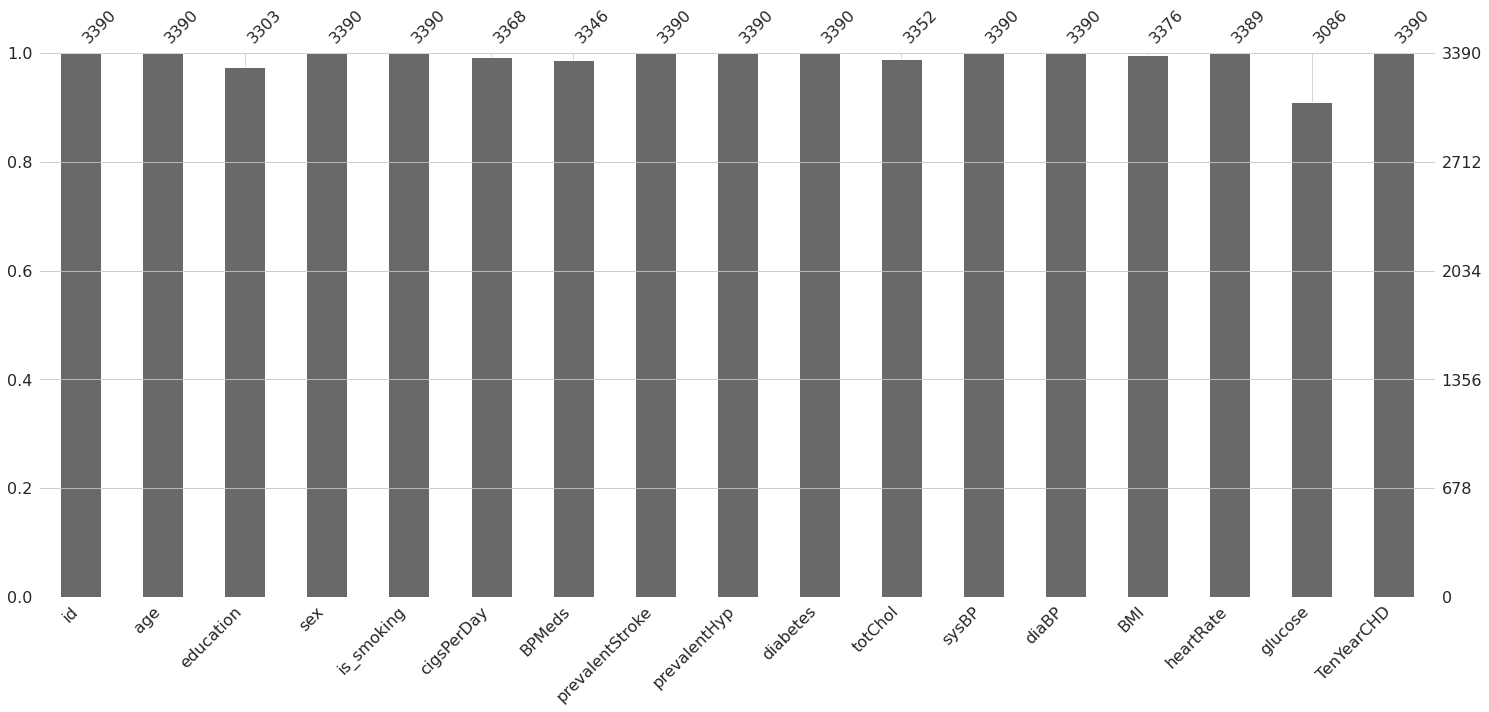

In [ ]:
# Visualizing the missing values
msno.bar(crp_df)

### What did you know about your dataset?

Answer Here - Data set is in csv format, it has 3390 rows and 17 columns.

7 columns have null values namely:

education column has 87 null values, cigs_per_day has 22, BP_Meds has 44, totchol has 38, BMI has 14, and glucose ha 304.
since our data set is very small we cannnot remove or drop null values, we can only replace them.

Dataset does not have any duplicate values as well.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
crp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
crp_df.describe().round(2).style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

### Variables Description 

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Age|Age of the patient||totChol|Cholestrol measure|
|Education|Eduaction of the patient||sysBP|systolic blood pressure|
|Sex|male or female("M" or "F")||diaBP|diastolic blood pressure|
|is_Smoking|Whether smoking currently or not||BMI|Body Mass Index|
|cigsPerDay|Cigarettes smoked per day||heartRate|Heart Rate Measure|
|BPMeds|whether or not the patient was on blood pressure medication||glucose|Level of glucose in th body|
|prevalentStroke|whether or not the patient had previously had a stroke||prevalentHyp| whether or not the patient was hypertensive |
|diabetes|Patient has Diabetes or not||TenYearCHD|10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”|

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in crp_df.columns:
  uniques=crp_df[col].unique()
  print(uniques)

[   0    1    2 ... 3387 3388 3389]
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
[ 2.  4.  1.  3. nan]
['F' 'M']
['YES' 'NO']
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
[ 0. nan  1.]
[0 1]
[0 1]
[0 1]
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 313. 305. 285. 169. 224. 201. 185. 307. 179. 280. 219. 391. 300.
 253. 345. 278. 282. 255. 191. 439. 327. 287. 236. 332. 207. 230

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

### What all manipulations have you done and insights you found?

Answer Here - We have just classified columns into categorical and numerical so that it becomes easy when we are performing EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

#### Chart - 1

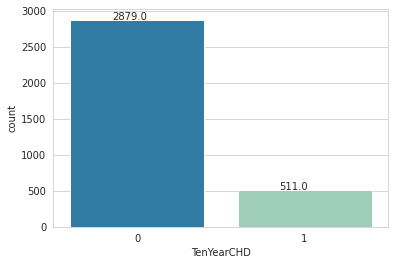

In [ ]:
# Chart - 1 visualization code
# target/dependent variable distribution
sns.set_style('whitegrid')
ax=sns.countplot(x='TenYearCHD', data=crp_df, palette='YlGnBu_r')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here -  we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Distribution of dependent variable shows that very less number of people (511) are prone to cardiovascular risk. Graph clearly shows that 2879 people are out of risk zone.

#### Chart - 2

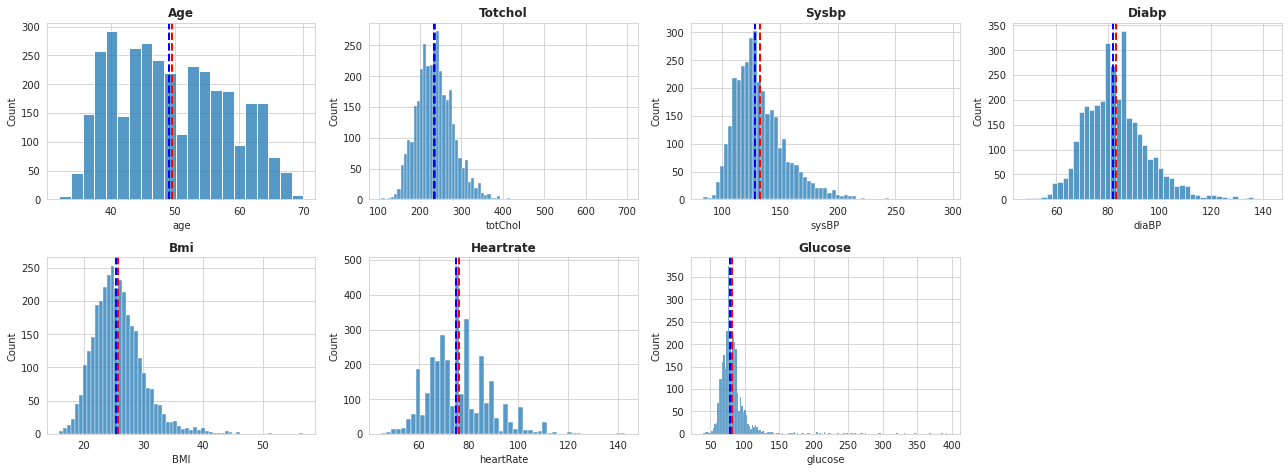

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(18,16))
for n,column in enumerate(numerical_columns):
  feature = crp_df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here - Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - 


*   Age distribution displays a mean or avrage of 49.5 and the data ranges from 35 to 70.
*   TotChol has range from 100 to 700 with an average of around 240.

*   SysBP has range from 90 to 300 with an average of around 140.
*   DiaBP has range from 55 to 140 with an average of around 82-83.

*   BMI represents a normal distribution with most values between 20-40 and few exceeding values, it has an average ofaround 25.
*   HeartRate distribution displays a mean or average of 75 and the data ranges from 55 to 140.

*   Glucose distribution is highly skewed with its lowest value being 50 to its highest value 400 average of this distribution is around 80.










#### Chart - 3

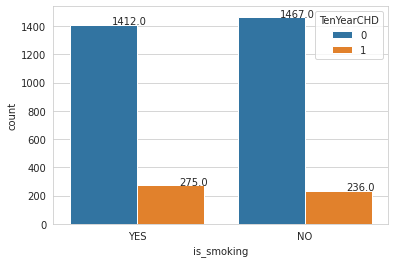

In [ ]:
# Chart - 3 visualization code
# CHD among the people who smoke and the ones who don't 
ax=sns.countplot(data=crp_df, x='is_smoking', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - As we know bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above plot shows that even if the person is not smoking he/she is at equal risk of cardiovascular diseases when compared to people who are smoking. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- As we can observe that people are at equal risk regradless of they are smoking or not thus when an healthcare company is promoting any specific health care service be it Insurance, routine checkup plans, or tests, they can spread the awareness in no smoking community as well, which inturn increases the consumer base and give protection to wider population and profits to company. 

#### Chart - 4

Text(0.5, 1.0, 'Education level of people ')

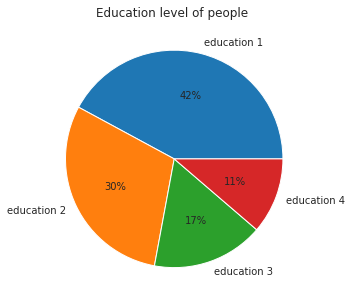

In [ ]:
# Chart - 4 visualization code
fig=plt.figure(figsize=(10,5))
labels = 'education 1','education 2','education 3','education 4'
plt.pie(crp_df['education'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Education level of people ")

##### 1. Why did you pick the specific chart?

Answer Here - We have used pie chart to present education column, Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here -  we can see from the above chart that education 1 has larger population chunk (42%) than others and the least proportion goes to education 4 with 11%.

## **Bivariate Analysis**

#### Chart - 5

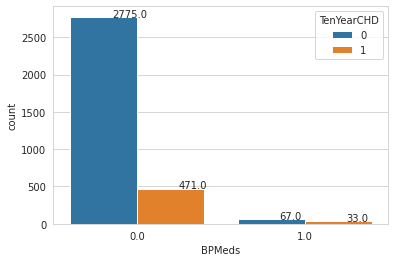

In [ ]:
# Chart - 5 visualization code
ax=sns.countplot(data=crp_df, x='BPMeds', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here -For BPMeds distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Very less number of people were found to be taking BP medicines and 50% of them were at higher risk to cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- Healthcare companies and doctors can target and inspect the patient more throughly who is on BP medication. Which inturn decreases the cost of diagnosis and increases revenue of the company  

#### Chart - 6

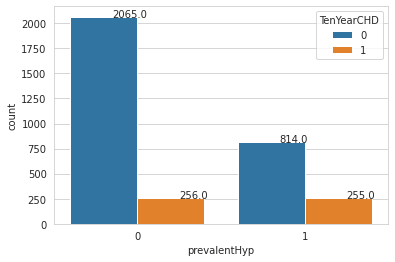

In [ ]:
# Chart - 6 visualization code
#PrevelentHype means whether the patient was hypertensive and their chances of happening CHD
ax=sns.countplot(data=crp_df, x='prevalentHyp', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Prevalent hypertension has also been represented using bar charts as, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above graph shows that people already having hypertension are more prone to cardiovascular disease(31%) as compared to people not having hypertension(12.4%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- Special health care plans, checkup plans and insurance plans can be designed for paitents with hypertension issues, which in turn provides convinience and safety to paitents and generate more revenue for the company.

#### Chart - 7

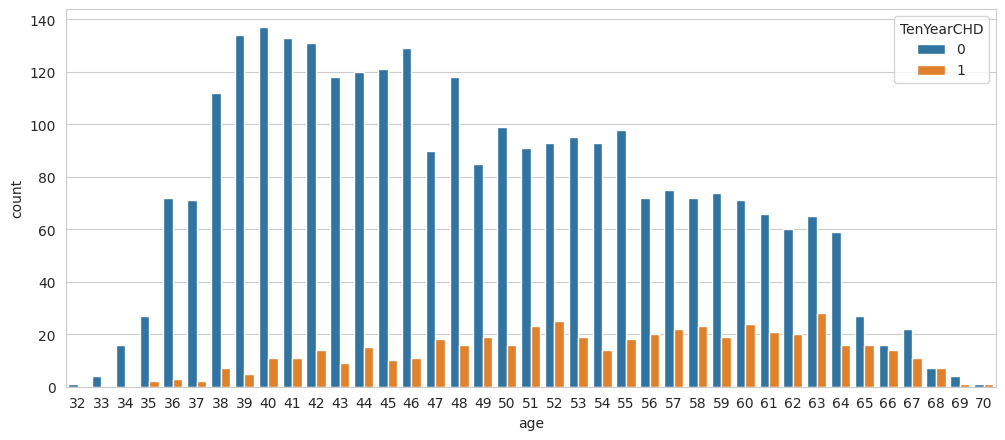

In [ ]:
# Chart - 7 visualization code
# Chances of CHD with respect to age 
ax=plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=crp_df, x='age', hue='TenYearCHD')

##### 1. Why did you pick the specific chart?

Answer Here - Age distribution with respect to CHD risk has been represented using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - With increasing age, chances of having cardiovascular disease increases. As the graph shows people from age 50 acquires higher risk of cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- This is very useful insights of insurance companies as it proves that as human body ages risk of cardio vascular issues increases, this information can be leveraged by insurance companies to spread awareness in young population that if the start the policy early their future will be safe, and premium will also be less as they will  have more years. 

#### Chart - 8

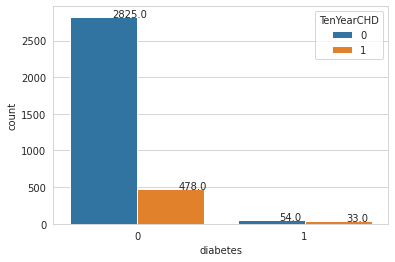

In [ ]:
# Chart - 8 visualization code
#Chances of CHD for a diabetic patient 
ax=sns.countplot(data=crp_df, x='diabetes', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here -  For distribution of diabetes with respect to CHD risk bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Diabetic people are at very high risk of getting cardiovascular disease. As the graph shows  among 87 people 61.1% of population are at higher risk of getting cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- Besides business impact is information is very important for the paitients well being, i.e if there are 61 % chances in for the diabetic paitents for cardio vascular issues, Treatments and medication of cardio vascular diseases can be coupled with early signs of diabeties, As blood starts getting viscous with increase in concentration of glucose. This will also impact the revene of companies in positive way

#### Chart - 9

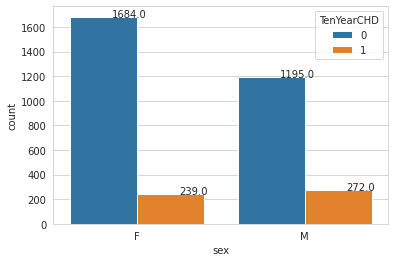

In [ ]:
# Chart - 9 visualization code
#Cardiovascular Risk Man
ax=sns.countplot(data=crp_df, x='sex', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Gender and CHD risk has been represented using bar charts,Bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - As compared to females, males are prone to cardiovascular risks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- This information will help many nutritional brands in encouraging and promoting good nutrition for the male body.

#### Chart - 10

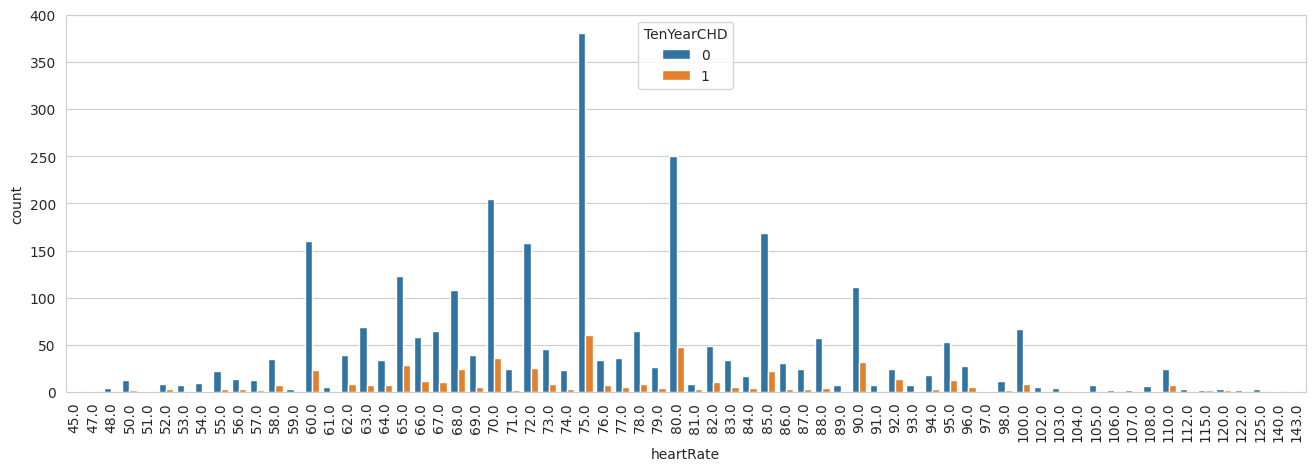

In [ ]:
# Chart - 10 visualization code
#CHD chances with respect to heartrate
plt.figure(figsize=(16,5), dpi=100)
sns.countplot(data=crp_df, x='heartRate', hue='TenYearCHD')
plt.xticks(rotation=90);

##### 1. Why did you pick the specific chart?

Answer Here - Heart rate and CHD risk has also been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here - In the dataset of around 4000 individual only ~ 380 (~ 9.5%) individuals are having normal heart rate, i.e (75 bpm).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- This show that there is major population with abnornal heart rate due to various reasons, if awareness is spread it can help various health, nutrition and fitness, insurance and dignostic companines to generate revenue and also help the population to adapt more to better habits & to keep there heart rates in check.

#### Chart - 11

Text(0.5, 1.0, 'BMI vs Age')

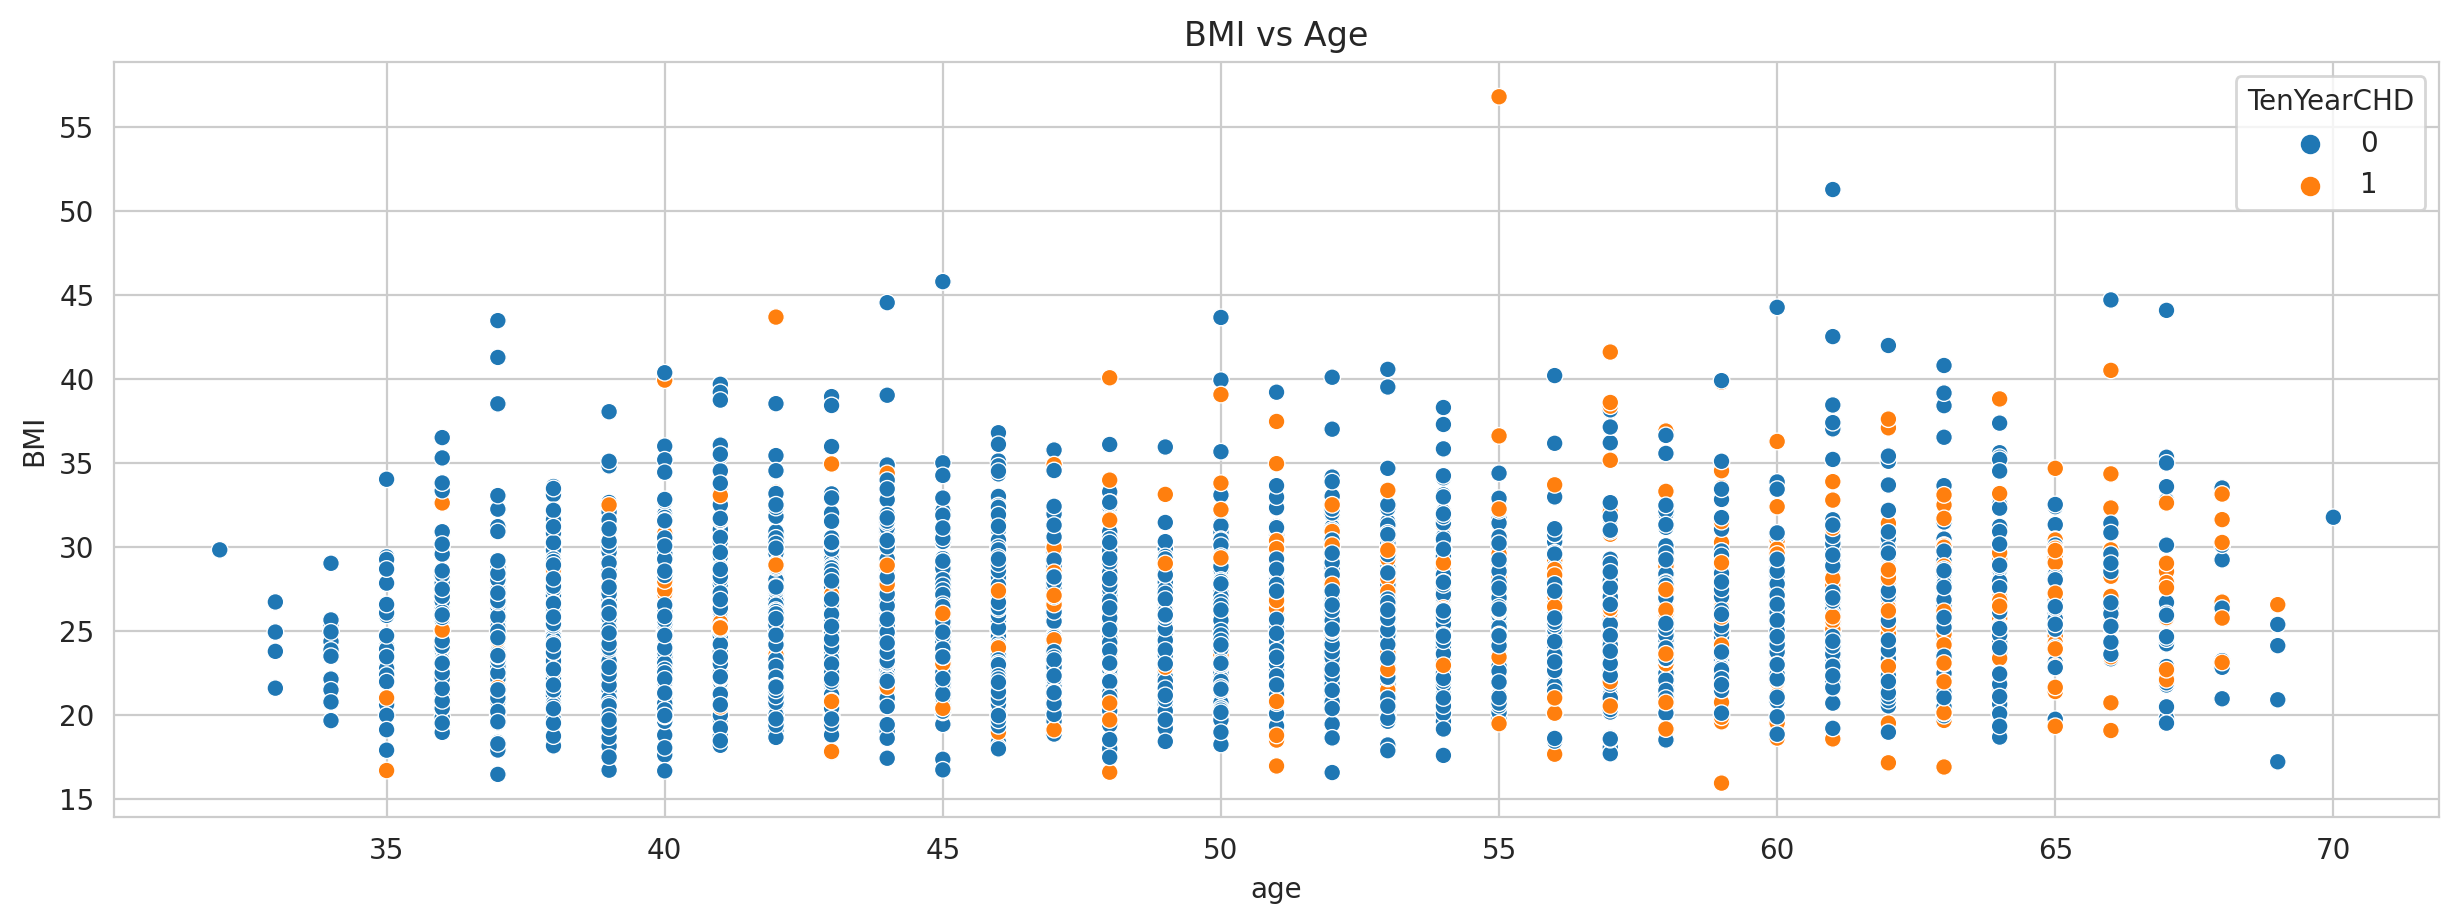

In [ ]:
# Chart - 11 visualization code
# BMI vs age and chances of CHD
figure = plt.subplots(figsize=(15,5), dpi=200)
sns.scatterplot(data=crp_df, x='age', y='BMI', hue='TenYearCHD')
plt.title('BMI vs Age')

##### 1. Why did you pick the specific chart?

Answer Here - Distribution of age and BMI with respect to CHD risk uses ascatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above scatterplot suggests that age has no correlation with BMI. Number of points showing people at risk, increases with increase in age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer :- A company can target both population with higher age and higher BMI, as they are at greater risk.  

#### Chart - 12

Text(0.5, 1.0, 'Systolic BP vs diastolic BP')

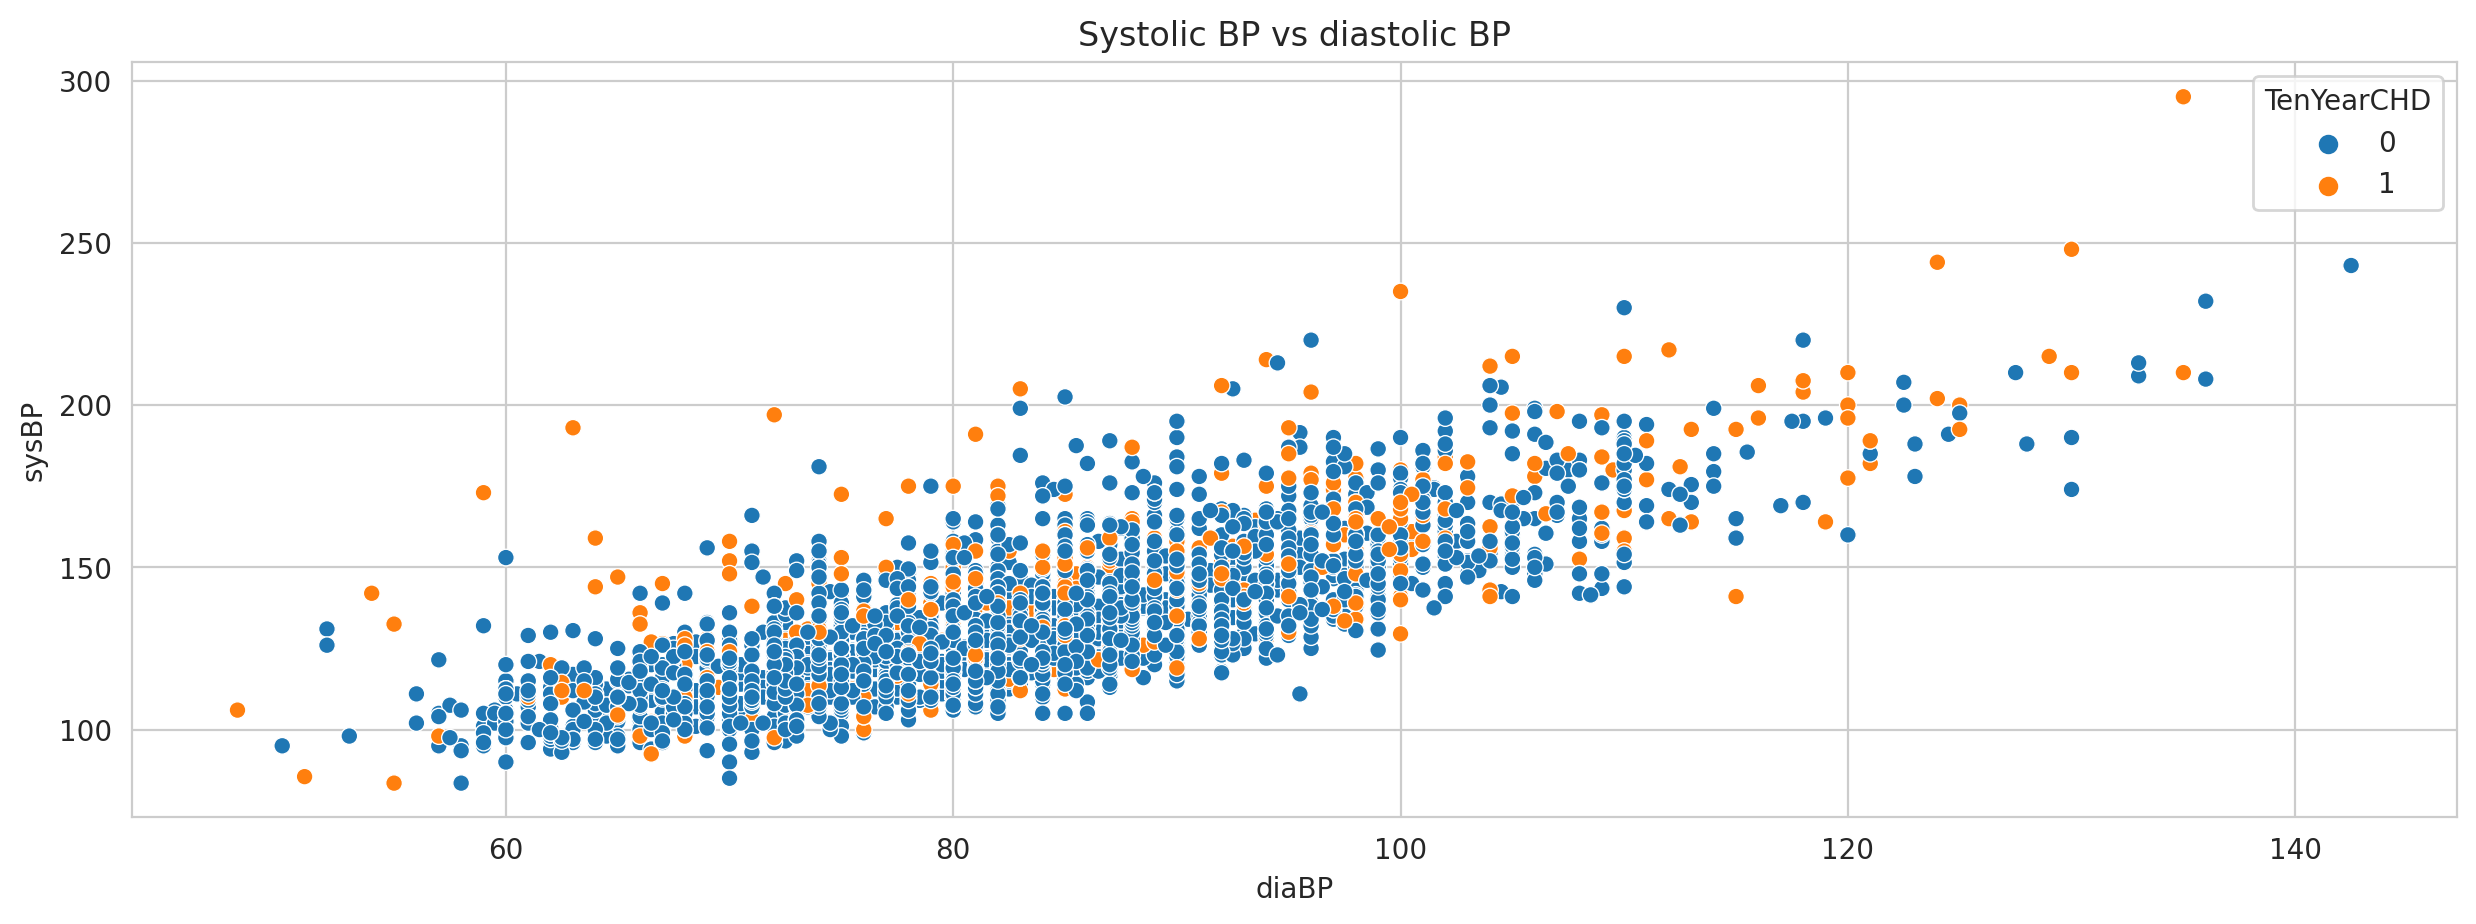

In [ ]:
# Chart - 12 visualization code
# Systolic BP and diastolic BP 
figure=plt.subplots(figsize=(15,5), dpi=200)
sns.scatterplot(data=crp_df, y='sysBP', x='diaBP', hue='TenYearCHD')
plt.title('Systolic BP vs diastolic BP')

##### 1. Why did you pick the specific chart?

Answer Here - We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above graph shows that systolic  blood pressure is positively correlated to diastolic blood pressure. As systolic and diatolic pressure increases risk of getting cardiovasclar diseases also increases.v

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- Systolic and dystolic blood pressures are giving informations on Blood pressure , thus we can see that increases in blood pressure increases the risk this information will help insurance companies will screening the eligible candidates for risk minimisation. 

#### Chart - 13

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

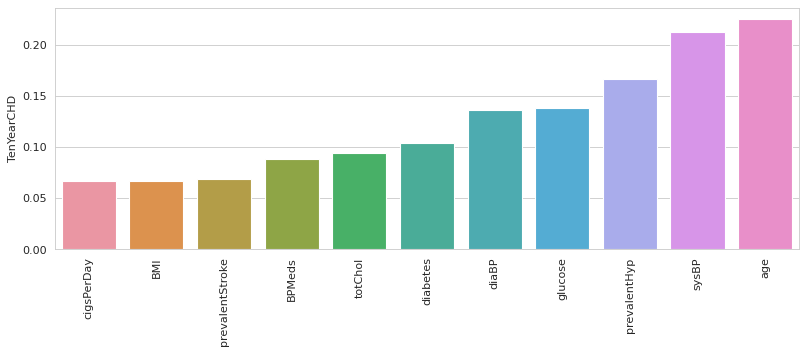

In [ ]:
# Chart - 13 visualization code
#order wise corelation wrt TenYearCHD
corr = pd.DataFrame(crp_df.corr()['TenYearCHD'].sort_values()[3:-1])
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(data=corr, x=corr.index, y='TenYearCHD')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here - Correlation of categories with respwct to CHD risk has been represented using bar chart, this chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - The above plot shows correlation of independent variables with dependent variable. we can see that age column is highly correlated to cardiovascular risk, followed by systolic blood pressure, MAP, and prevalent hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:- As age factor is contributing the most in the cardiovascular risk we can target every individual regardless of there health situations and habits as everyone is going to age. Awareness can be spread which can help all companies and individuals wellbeing.

## **Multivariate Analysis**

#### Chart - 14

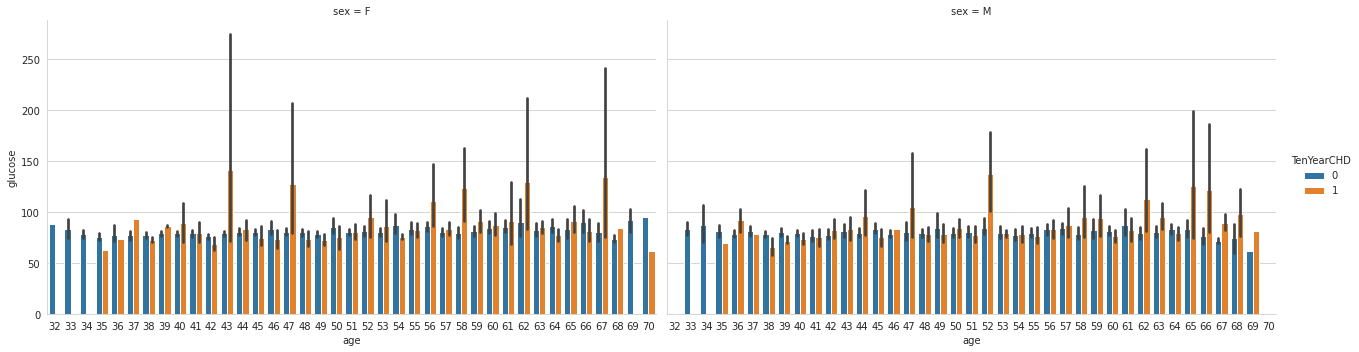

In [ ]:
# Chart - 14 visualization code
sns.catplot(x="age", y="glucose", hue="TenYearCHD",
            col="sex", aspect=1.8,
            kind="bar", data=crp_df)

##### 1. Why did you pick the specific chart?

Answer Here - Age-glucose distribution wth respect to gender and CHD risk uses a multiple bar chart for data representation. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Glucose levels are high in females as compared to males which increases the risk of CHD.

#### Chart - 15 - Correlation Heatmap

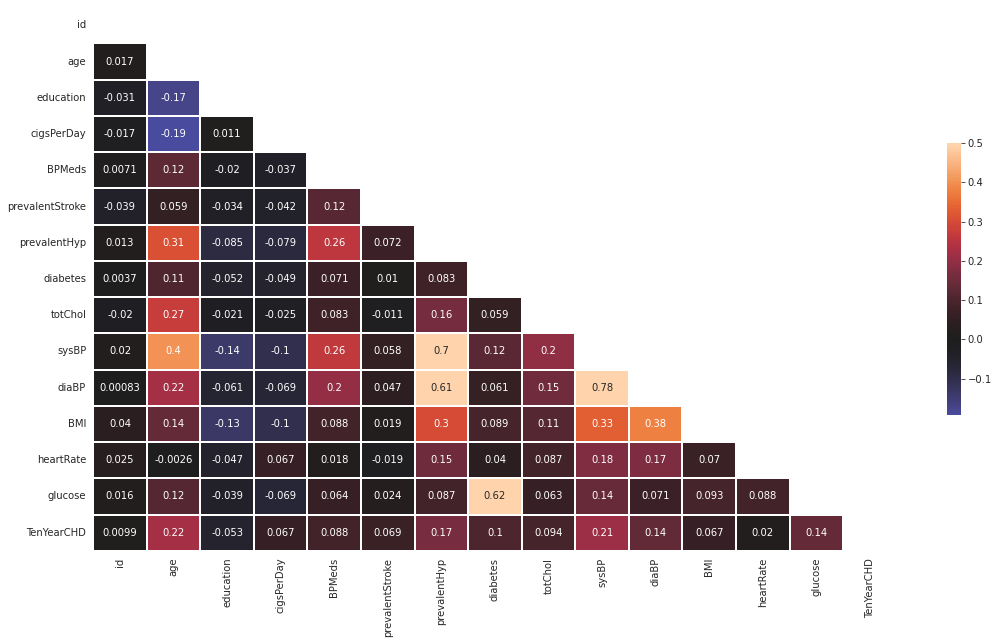

In [ ]:
# Correlation Heatmap visualization code
corr=crp_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, vmax=.5, center=0, annot=True, linewidths=1.0, cbar_kws={"shrink": .5})

##### 1. Why did you pick the specific chart?

Answer Here -  Correlations are best represented  using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Heatmap clearly shows that two of the columns namely systolic blood pressure and diastolic blood pressure are highly correlated which migh lead to higher accuracy during model training.

#### Chart - 16 - Pair Plot 

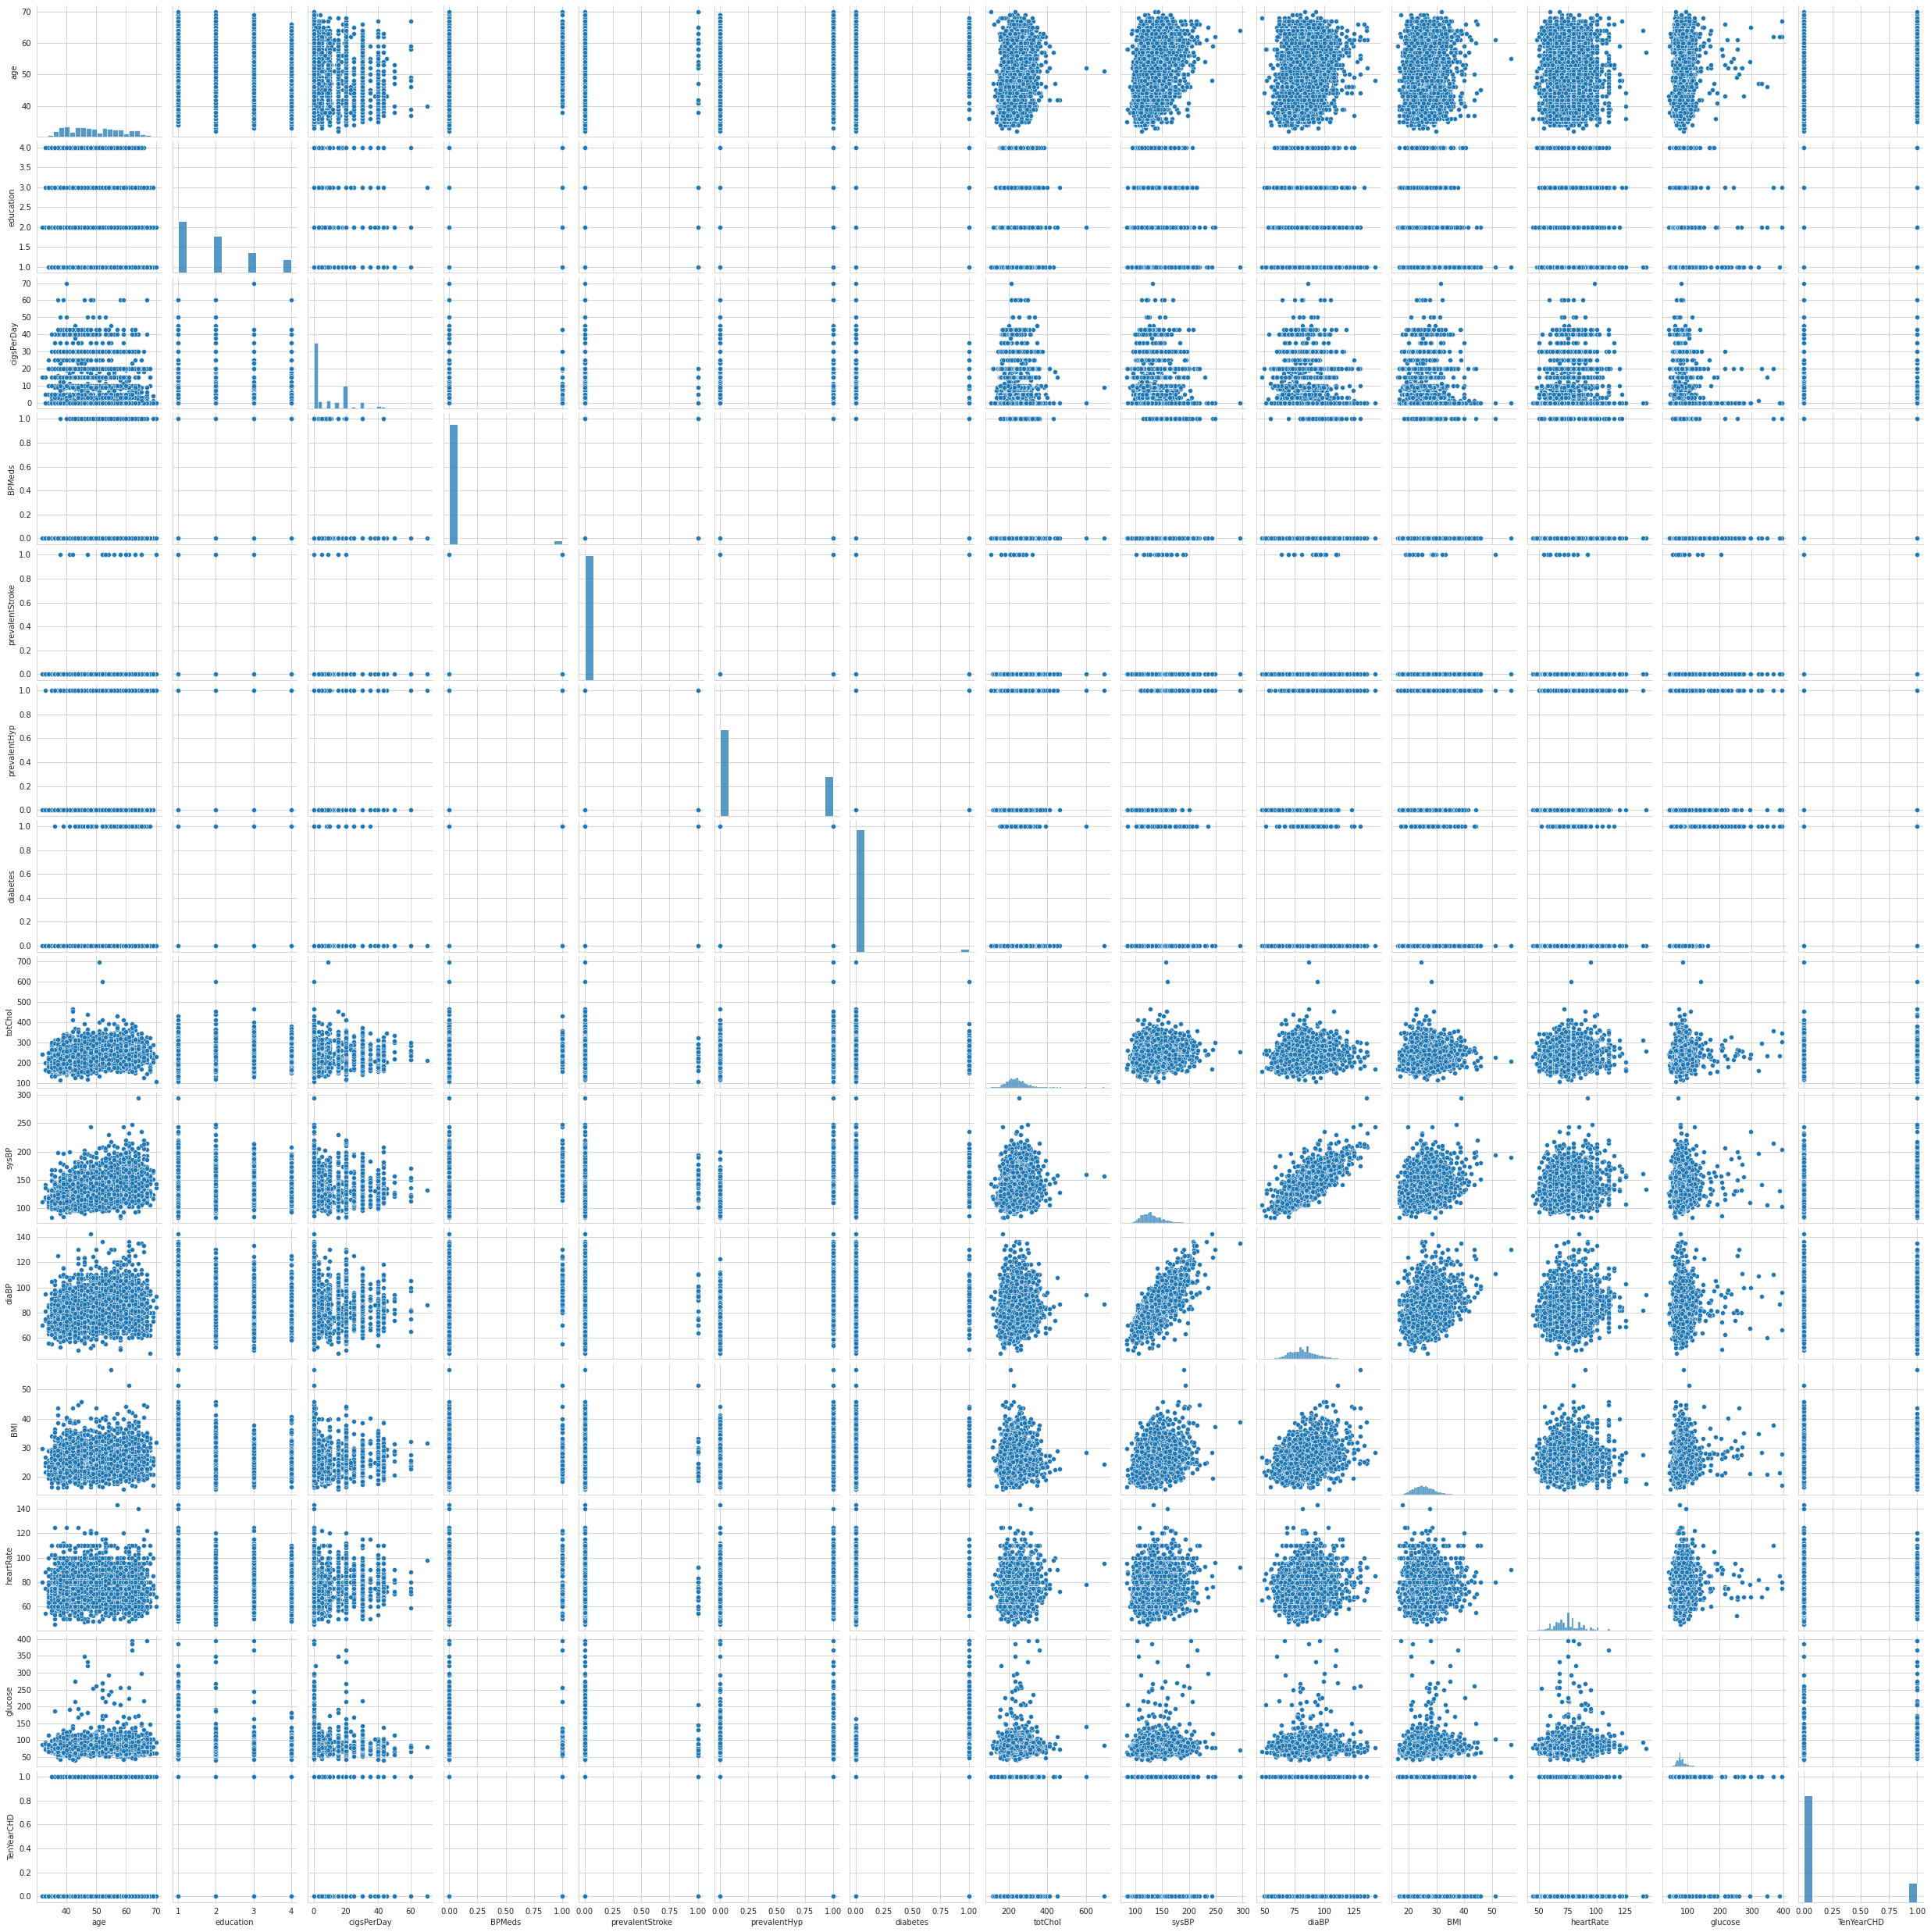

In [ ]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=crp_df.drop(('id'), axis=1))

##### 1. Why did you pick the specific chart?

Answer Here - Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Answer:
* We can observe that people of all the age groups are present in all the education types. 
* No of people smoking more than 4 cigs are also in all age groups but frequency is less
* Cholestrol, glucose and heartrate is not neccesarily increasing with age, as there are few cases of high cholestrol, glucose and heartrate.
* Education has no direct impact on no of cigerates, but as education increases frequency of high vital readings decreases .
* Systolic and diastolic BP is directly proportional to each other, thus can be combined with formula of blood pressure.
* As BMI increases there is an increase in blood sugar level and cholestrol.
 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here

*   Null Hypothesis(H0) - Data set does not have any outliers.
*   Alternative Hypothesis(H1) - Dataset has outliers.


#### 2. Perform an appropriate statistical test.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

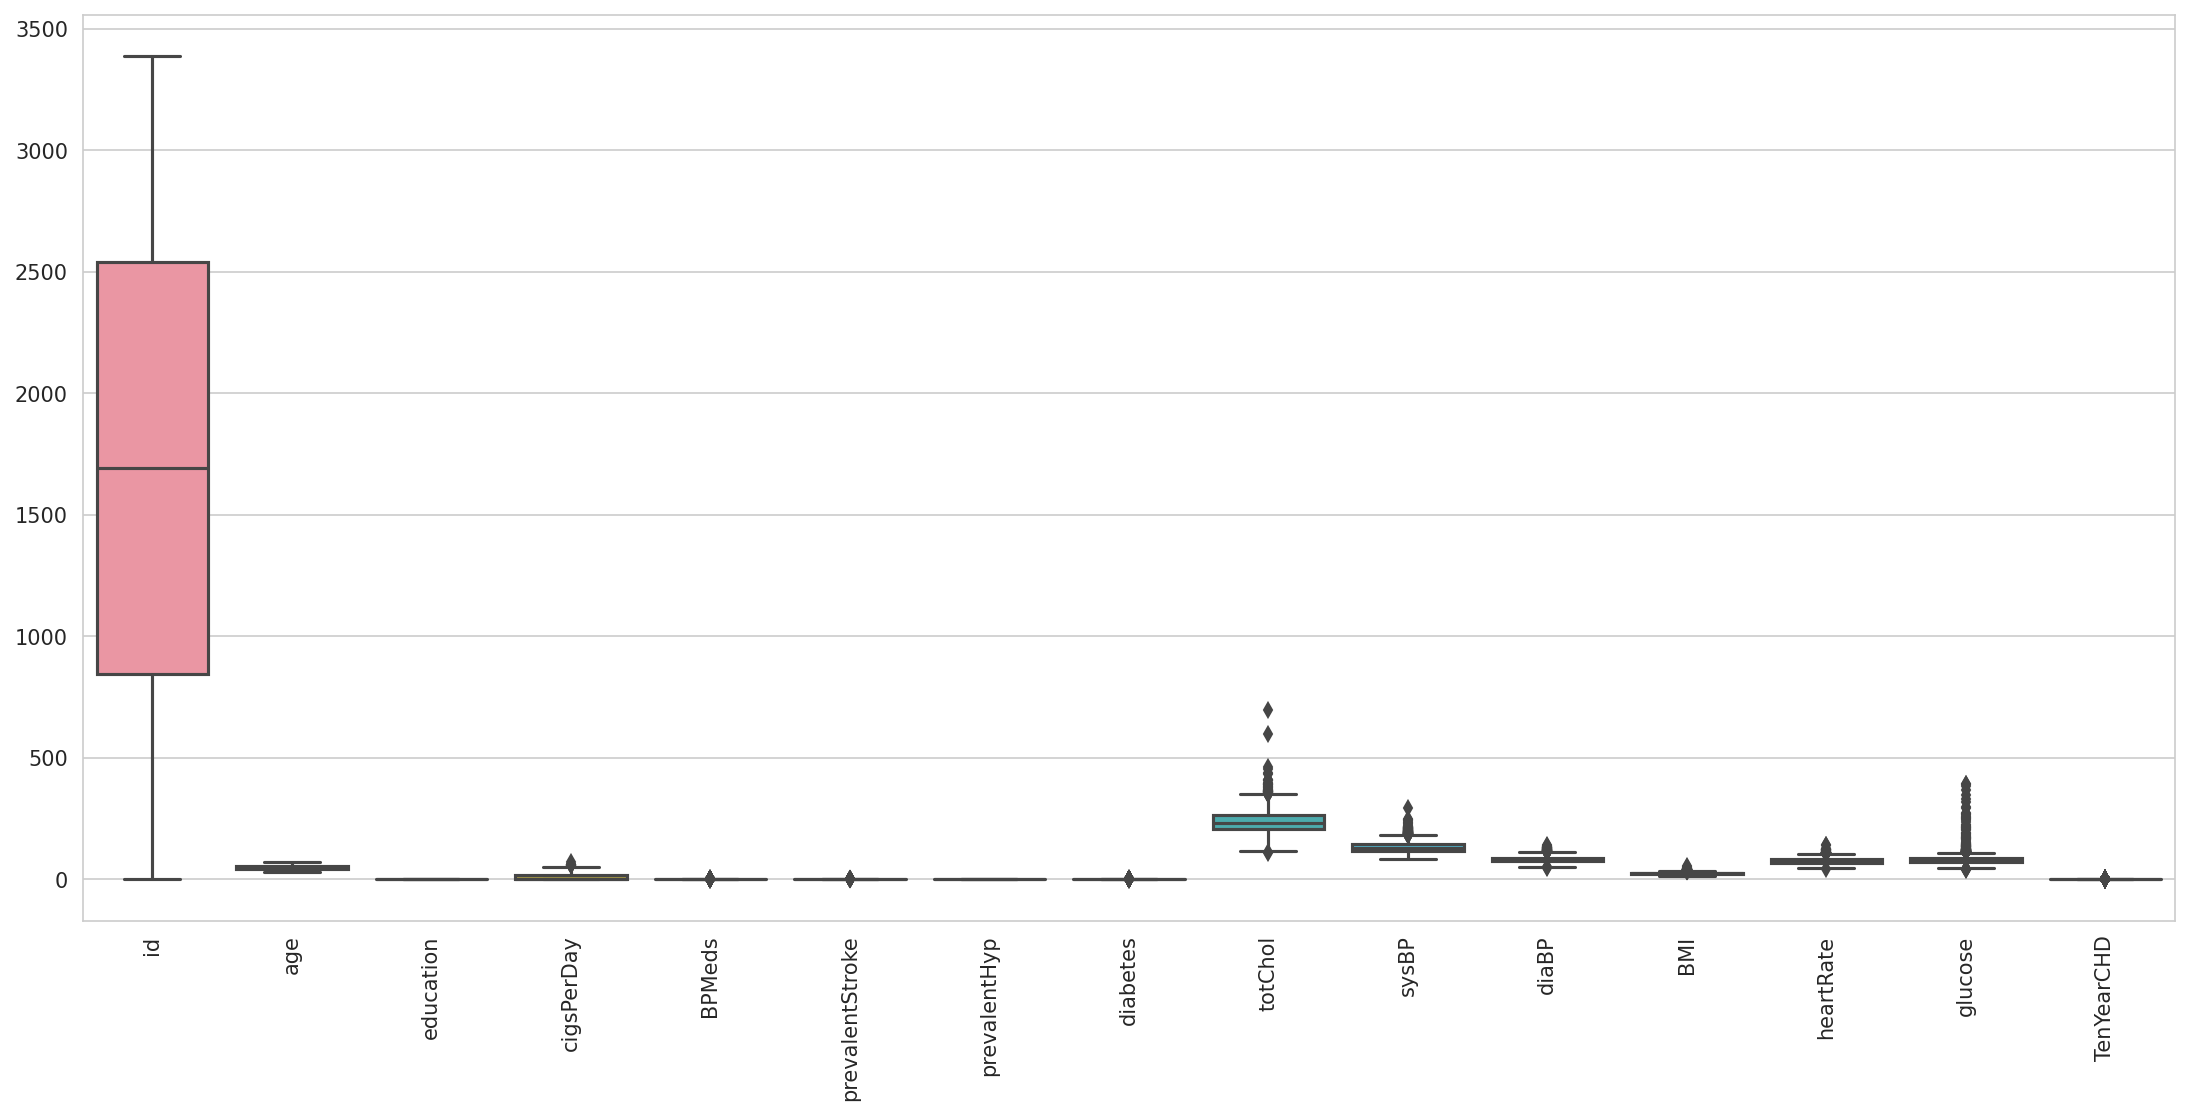

In [ ]:
# outliers check
plt.figure(figsize=(18,8),dpi=150)
sns.boxplot(data = crp_df)
plt.xticks(rotation=90)

##### Which statistical test have you done to obtain P-Value?

Answer Here - We have used boxplots for the hypothesis testing, as we are determining the presence of outliers.

##### Why did you choose the specific statistical test?

Answer Here - Boxplots display a 5 number summary of data, this summary is first quartile, mean, third quartile, minimum, maximum, and the values beyond min and max are the outliers. and in the above test we can clearly see that we  have to reject our null hypothesis as our dataset has a lot of outliers.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.
*   Alternative Hypothesis(H1) - Age is not related to cardiovascular risks.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [crp_df['age'], crp_df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

p value is 1.0
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

Answer Here - Chi Square Test

##### Why did you choose the specific statistical test?

Answer Here - We have used chi-square test in order to determine whether there is a significant association between the two variables. In our case 'age' and 'TenyearCHD' are the two variables. test shows that age and risk have a significant impact on each other,therefore we failed to reject null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here :

*   Null Hypothesis(H0) - mean = 237
*   Alternative Hypothesis(H1) - mean != 237

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(crp_df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject H0")
else:
    print("failed to reject H0")

nan
failed to reject H0


##### Which statistical test have you done to obtain P-Value?

Answer Here - Z-Test

##### Why did you choose the specific statistical test?

Answer Here - Z-Test is used usually when data points are independent of each other and data is normally distributed.
Failed to reject null hypothesis as the condition stands true.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Replacing null values with median continuos data type 
crp_df['cigsPerDay'] = crp_df['cigsPerDay'].fillna(crp_df['cigsPerDay'].median())
crp_df['totChol'] = crp_df['totChol'].fillna(crp_df['totChol'].median())
crp_df['BMI'] = crp_df['BMI'].fillna(crp_df['BMI'].median())
crp_df['heartRate'] = crp_df['heartRate'].fillna(crp_df['heartRate'].median())
crp_df['glucose'] = crp_df['glucose'].fillna(crp_df['glucose'].median())
# Replacing null values with mode for 
crp_df['education'] = crp_df['education'].fillna(crp_df['education'].mode()[0])
crp_df['BPMeds'] = crp_df['BPMeds'].fillna(crp_df['BPMeds'].mode()[0])

In [ ]:
# Checking again
crp_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here - As for the numerical columns we used median to replace null values present we could have used mean value but as we know that mean is affected by outliers whereas median is not affected by outliers. For the categorical data we used mode(returns a repeated value which has been repeated highest) to replace null values 

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  

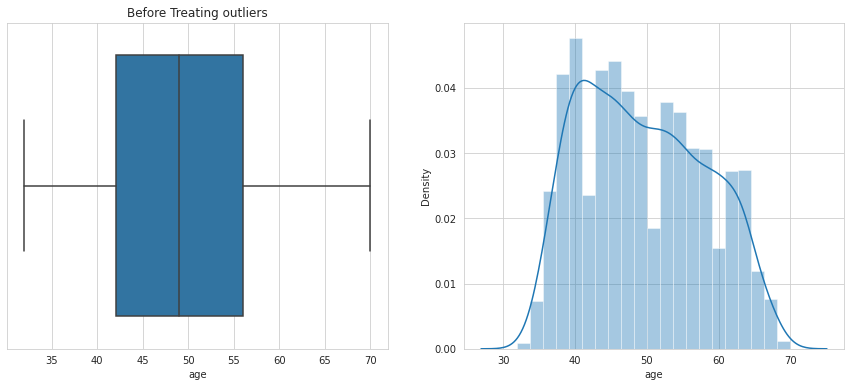

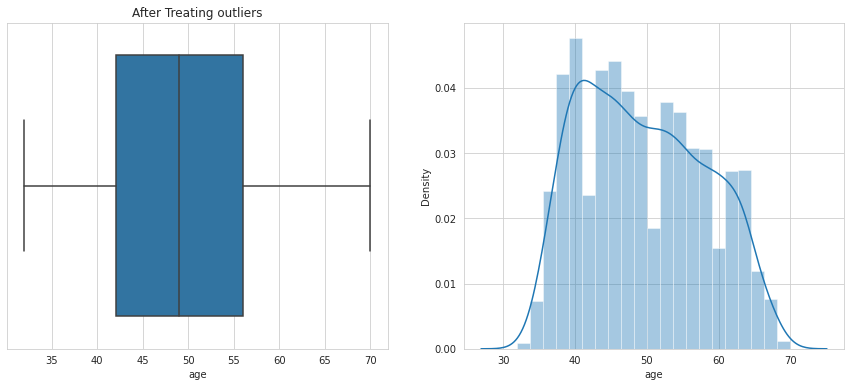

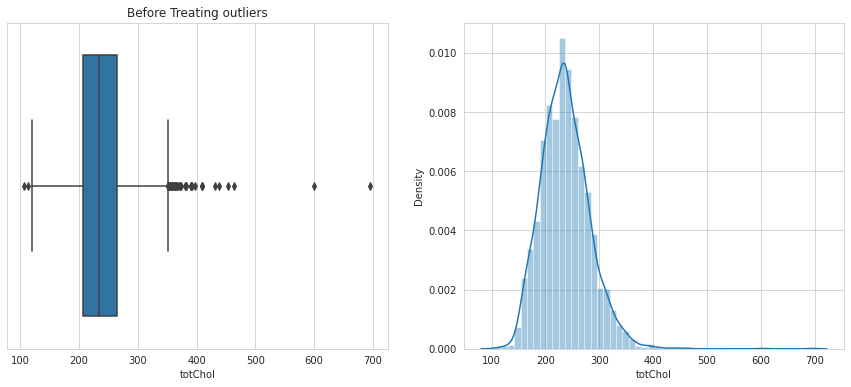

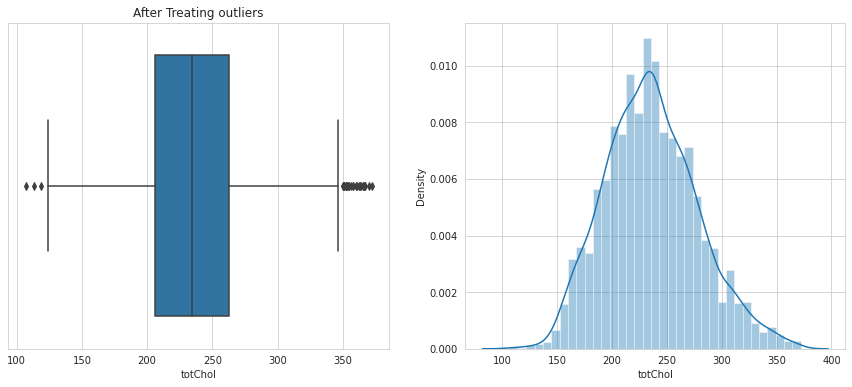

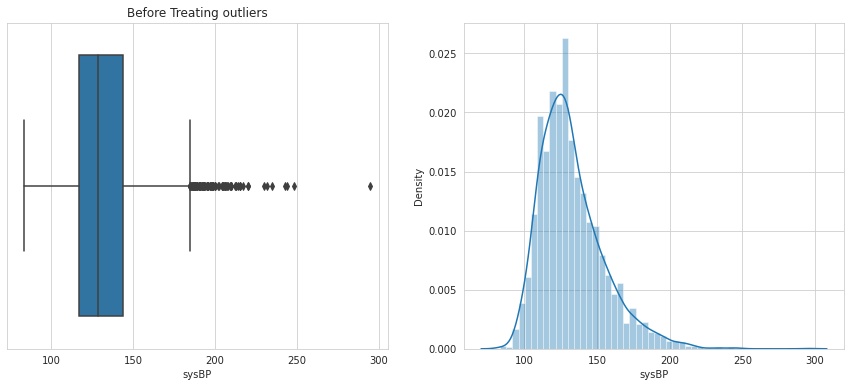

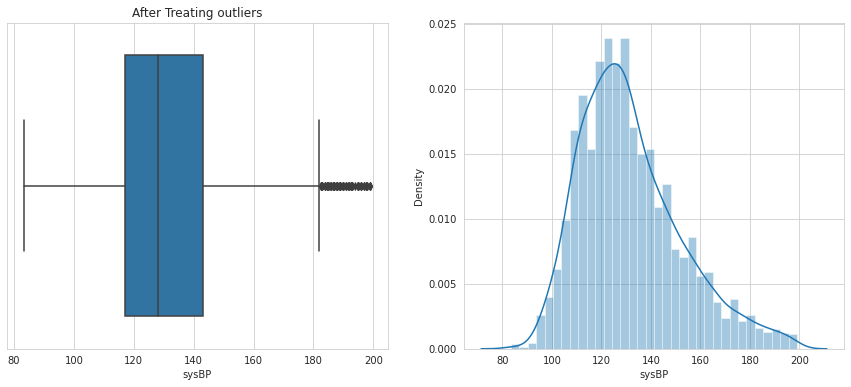

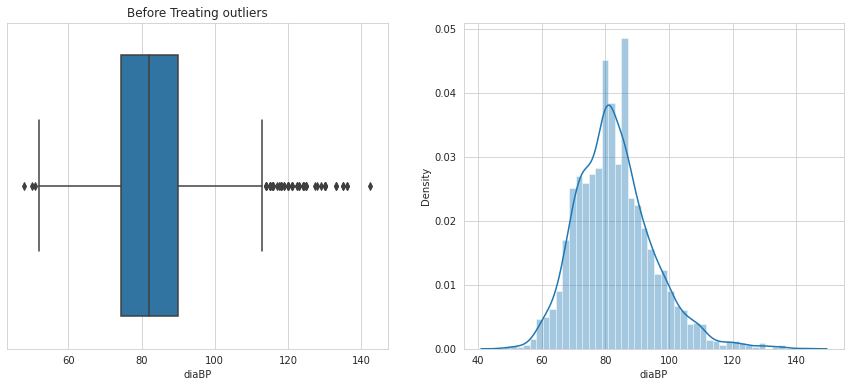

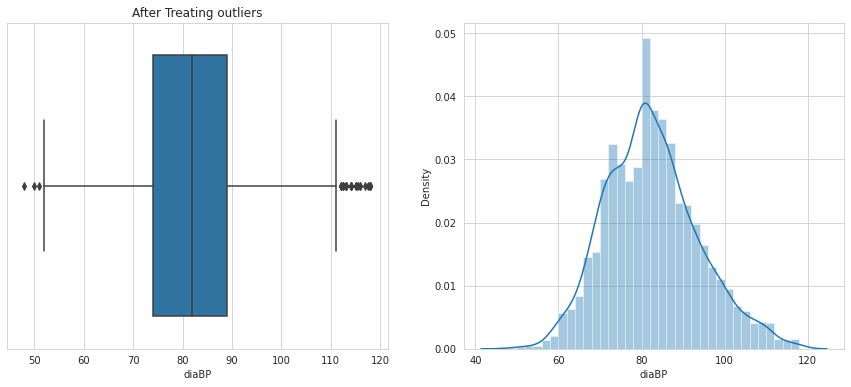

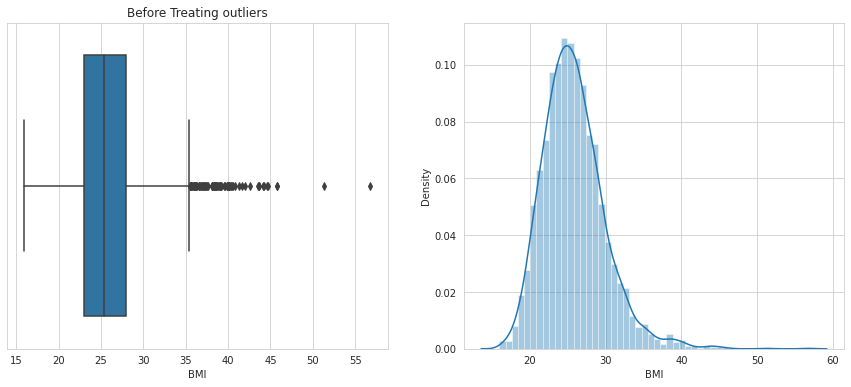

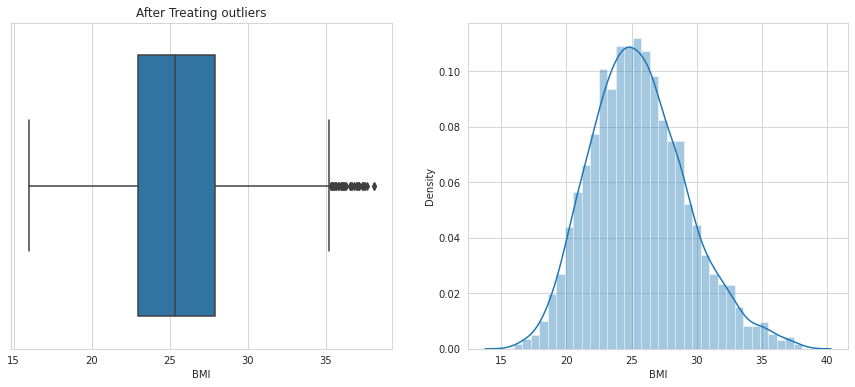

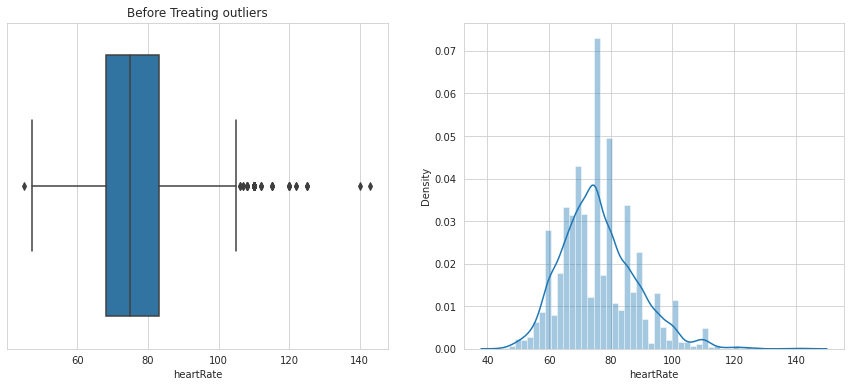

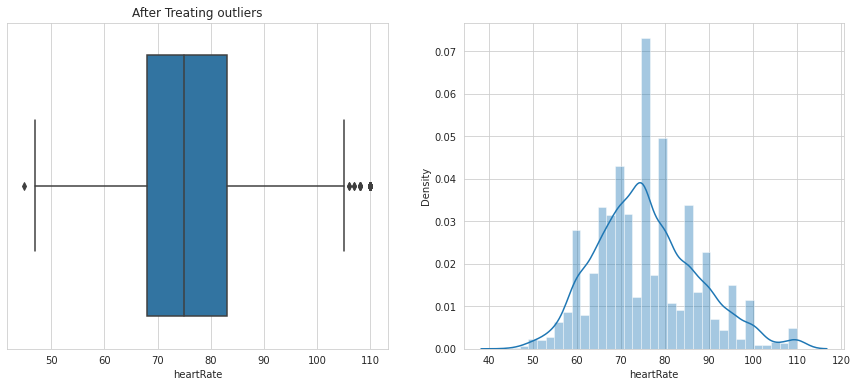

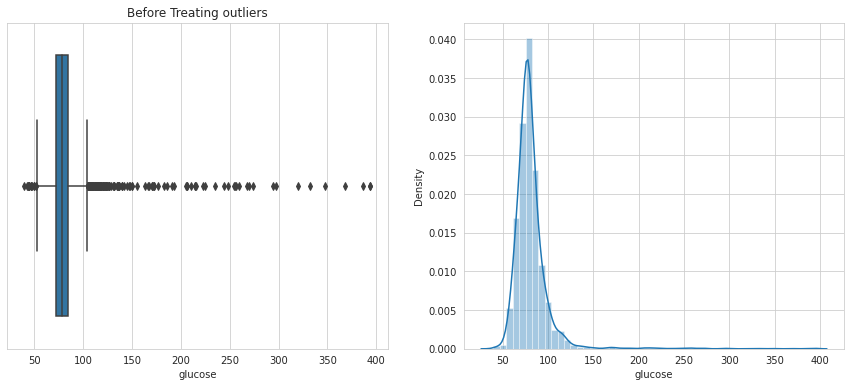

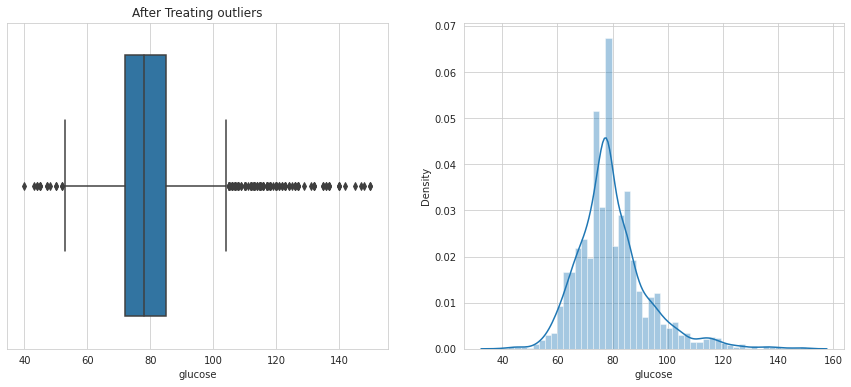

In [ ]:
for column in numerical_columns:
  remove_outlier(crp_df,column)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here - We used Z score treatment for treating outliers. Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean. We are not supposed to remove all the outliers as we can see from the above boxplots that we have a lot of outliers in few of the columns but we cannot remove or replace as high values of BMI, BP, etc show that patient has high risk of cardivascular disease, if we remove these values we might get false results during model predictions. but few vlues wivh were baseless such as BMI value of 0 has to be removed. so in the above charts we have removed irrelevant outliers.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Adding a new column BP
crp_df['BP'] = 0

crp_df.loc[(crp_df['sysBP'] < 120) & (crp_df['diaBP'] < 80), 'BP'] = 1

crp_df.loc[((crp_df['sysBP'] >= 120) & (crp_df['sysBP'] < 130)) &
         ((crp_df['diaBP'] < 80)), 'BP'] = 2

crp_df.loc[((crp_df['sysBP'] >= 130) & (crp_df['sysBP'] < 140)) |
         ((crp_df['diaBP'] >= 80) & (crp_df['diaBP'] < 90)), 'BP'] = 3

crp_df.loc[((crp_df['sysBP'] >= 140) & (crp_df['sysBP'] < 180)) |
         ((crp_df['diaBP'] >= 90) & (crp_df['diaBP'] < 120)), 'BP'] = 4

crp_df.loc[(crp_df['sysBP'] >= 180) | (crp_df['diaBP'] >= 120), 'BP'] = 5

cols_BP = ['sysBP', 'diaBP']
crp_df.drop(cols_BP, axis= 1, inplace= True)

In [ ]:
# Changing cigsperday into a categorical column
for i in range(len(crp_df)):
  if crp_df['cigsPerDay'][i] == 0:
    crp_df['cigsPerDay'][i] = 'No Consumption'
  elif crp_df['cigsPerDay'][i] > 0 and crp_df['cigsPerDay'][i] < 20:
    crp_df['cigsPerDay'][i] = 'Average consumtion'
  else:
    crp_df['cigsPerDay'][i] = 'High Consumption'

### 4. Categorical Encoding

In [ ]:
# Encode your categorical columns
crp_df=pd.get_dummies(crp_df, columns=['sex', 'education', 'prevalentStroke', 'BPMeds', 'BP', 'cigsPerDay'])
crp_df.columns

Index(['id', 'age', 'is_smoking', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'sex_F', 'sex_M', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'prevalentStroke_0',
       'prevalentStroke_1', 'BPMeds_0.0', 'BPMeds_1.0', 'BP_1', 'BP_2', 'BP_3',
       'BP_4', 'BP_5', 'cigsPerDay_Average consumtion',
       'cigsPerDay_High Consumption', 'cigsPerDay_No Consumption'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here - We had education, sex, prevalent stroke, BPMeds, cigsperday and is_smoking columns that were categorical but as is_smoking column was not that relevant we had to remove it, we had a similar sort of column which gave similar information that is cigs_per_day, if this column has 0 count that means is_smoking column will have 'no' as its value, therefore we removed it. prevalent hypertension another categorical column which was removed due to its high correlation with BP. As for other columns columns we have used pd.get_dummies to convert test into dummy variable.This method is used to convert categorical data into dummy or indicator variables.

#### 2. Feature Selection

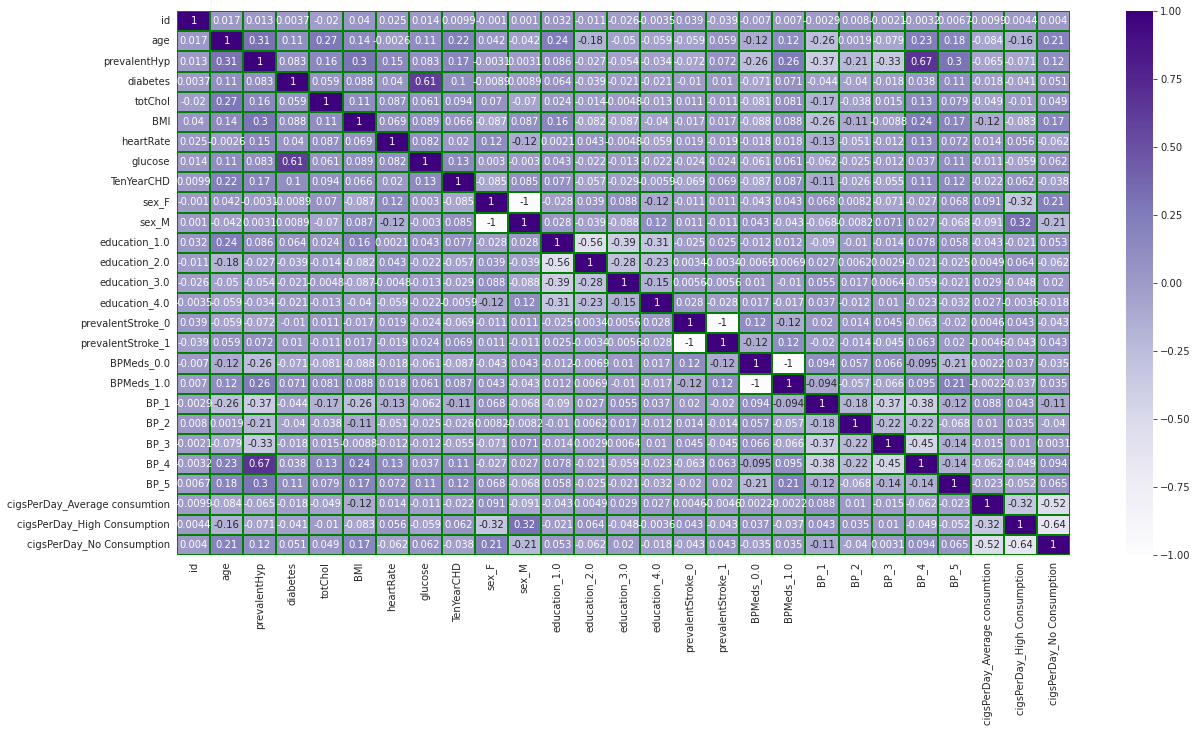

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize = (20, 10)) 
sns.heatmap(crp_df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

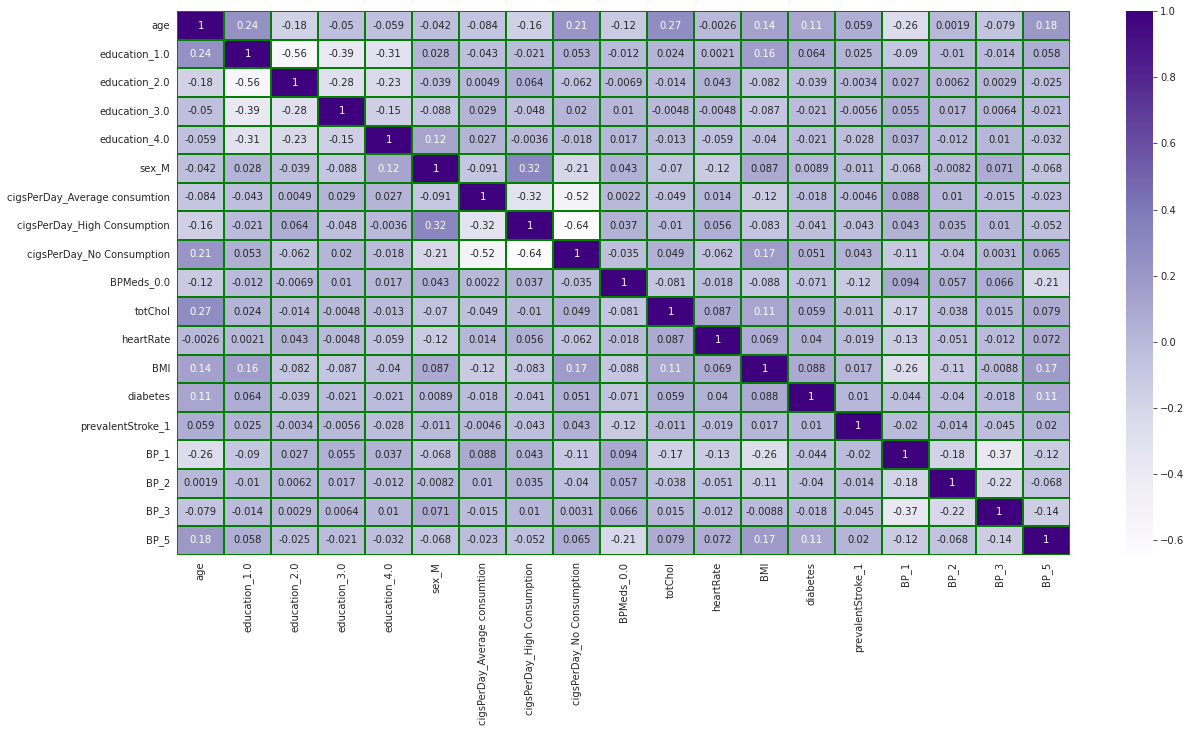

In [ ]:
# lets remove those features which seem to be correlated
features=['age',  'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0','sex_M',  'cigsPerDay_Average consumtion',
       'cigsPerDay_High Consumption', 'cigsPerDay_No Consumption' , 'BPMeds_0.0','totChol','heartRate', 'BMI', 'diabetes',
       'prevalentStroke_1', 'BP_1', 'BP_2', 'BP_3', 'BP_5']
final_df= crp_df[features]
plt.figure(figsize = (20, 10)) 
sns.heatmap(final_df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here - We  have used heatmap as feature selection method. Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves. 

From the heatmap we found that systolic blood pressure and diastolic blood pressure are highly correlated and need to be removed so we made a new feature by using those two. Blood pressure, the new feature was found to be correlated to prevalent hypertension so we had to one of them, at the same time we also found that BPMeds_1.0 is negatively correlated to BPMeds_0.0 and BP_4 is also highly correlated to prevalentstroke_0.

In [ ]:
# Feature Selection
selected_features = ['age','totChol','BMI','glucose','education_1.0','education_2.0','cigsPerDay_High Consumption','sex_M','BPMeds_1.0','prevalentStroke_1','BP_1','BP_3','BP_4','BP_5']
len(selected_features)

14

##### Which all features you found important and why?

Answer Here - We had to remove education_4.0, cigsPerDay_Average consumtion,  cigsPerDay_No Consumption, as the second heatmap showed correlation with these columns.

### 5. Data Splitting

In [ ]:
# Splitting data
x=crp_df[selected_features]
y=crp_df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 

##### What data splitting ratio have you used and why? 

Answer Here:

*   Train Set - 80
*   Test Set - 20

### 6. Data Scaling

In [ ]:
# Scaling data
scaler=MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##### Which method have you used to scale you data and why?

Answer Here: We have used MinMaxScaler to scale the data. MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. MinMaxScaler doesn't reduce the importance of outliers.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here - Data set is highly imbalanced, which is obvious. Number of people prone to cardiovascular diseases will be less as compared to number of people who are not prone, numbers denoted for people who are prone is 1 and who are not prone is 0, and this imbalanced data will give highly biased results.

In [ ]:
# Handling Imbalanced Dataset (If needed)
x_smote, y_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2305
1     407
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2192
1    2192
Name: TenYearCHD, dtype: int64 



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here -  It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.

We need to create a model that can forecast the risk of CHD, which is the rationale behind that. The model need to be able to foretell the risk of heart disease if there is even a remote possibility, given the patient's health statistics.

However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.

A typical technique would have improved our accuracy in this case due to the class imbalance, but in the real world, such a model isn't an acceptable answer because it's predicted that it will frequently fail to determine whether the patient is at risk, defeating the goal of the project.

Therefore, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class..

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lgr = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lgr.fit(x_smote, y_smote)
# Predict on the model
lgr_preds_prob = lgr.predict_proba(x_smote)[:,1]
lgr_preds= lgr.predict(x_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

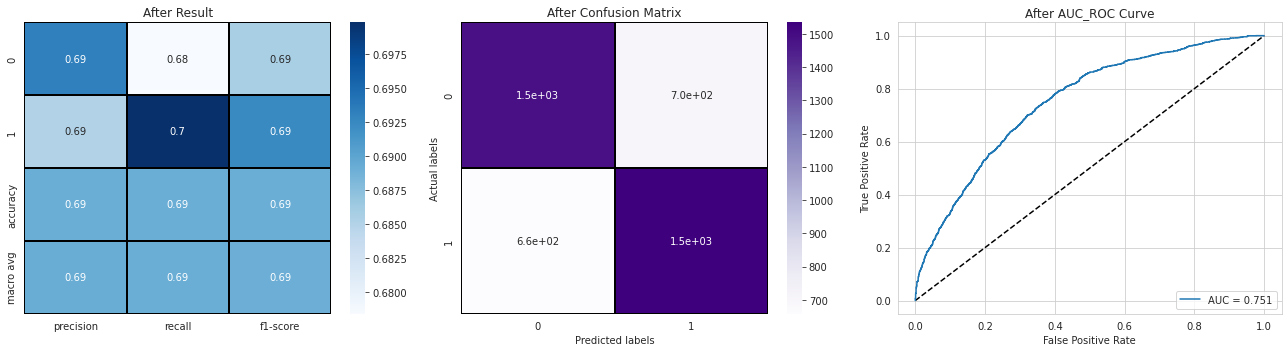

In [ ]:
# Visualizing evaluation Metric Score chart
result_1 = pd.DataFrame(classification_report(y_pred=lgr_preds, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, lgr_preds_prob)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_1.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=lgr_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

### ML Model - 2

In [ ]:
# ML Model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the Algorithm
knn.fit(x_smote, y_smote)
# Predict on the model
knn_y_pred = knn.predict(x_smote)
knn_preds_prob = lgr.predict_proba(x_smote)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

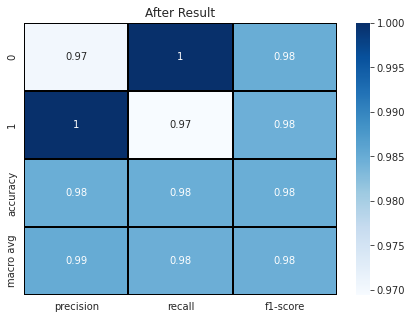

In [ ]:
# Visualizing evaluation Metric Score chart
result_2 = pd.DataFrame(classification_report(y_pred=knn_y_pred, y_true=y_smote, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_2.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn = KNeighborsClassifier() 
# GridSearch to find the best parameters
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn, param_grid, cv=5)
# Fit the Algorithm
knn_cv.fit(x_smote, y_smote)
# Predict on the model
knn_cv_y_pred = knn_cv.predict(x_smote)
knn_y_pred_proba = knn_cv.predict_proba(x_smote)[:,1]

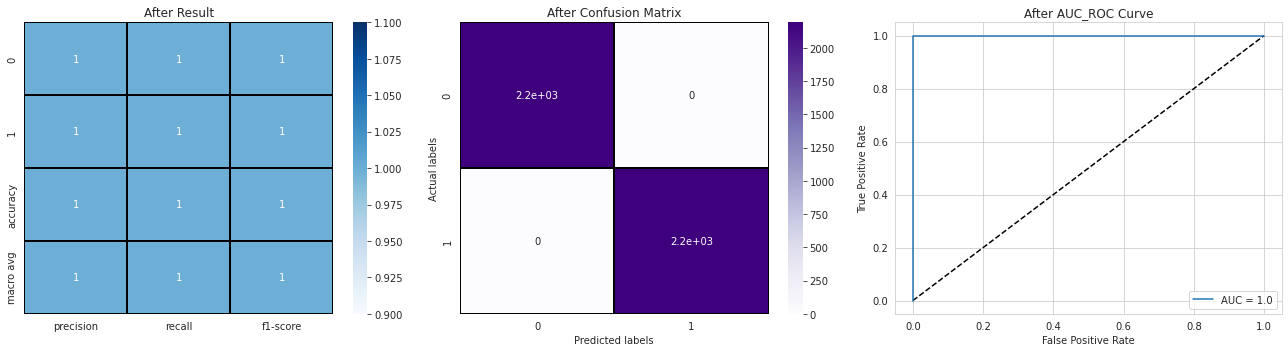

In [ ]:
# Visualizing evaluation Metric Score chart
result_3 = pd.DataFrame(classification_report(y_pred=knn_cv_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, knn_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_3.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=knn_cv_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Answer Here -  GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here - Improvement has been observed after cross validation.

Before f1 score: 0.98

After f1 score: 1.0

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here  - According to our dataset, data was highly imbalanced which is the only reason we will not be using accuracy as an evaluation metric, instead we will be considering f1 score which is average of recall and precision.

In case of cardiac diseases it is important to know number of positive cases than true positives, even if it if false positive there won't be any issue but if there is a false negative there might be serious issue so in this case calculating recall is way more important than precision, as recall gives us number of positives detected from total number of positives.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_smote, y_smote)
# Predict on the model
nb_y_pred = nb.predict(x_smote)
nb_y_pred_proba = nb.predict_proba(x_smote)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

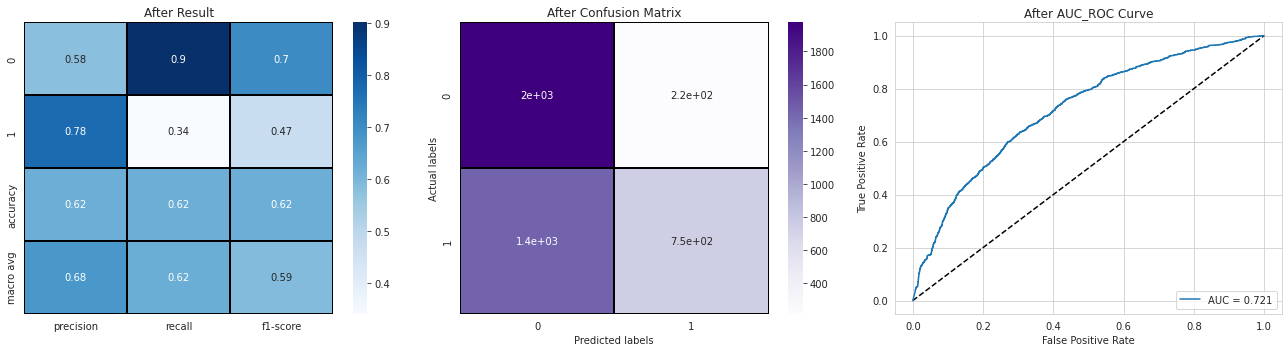

In [ ]:
# Visualizing evaluation Metric Score chart
result_4= pd.DataFrame(classification_report(y_pred=nb_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, nb_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_4.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=nb_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

### ML Model - 4

In [ ]:
# ML Model - 1 Implementation
xgb = XGBRFClassifier()
# Fit the Algorithm
xgb.fit(x_smote, y_smote)
# Predict on the model
xgb_y_pred = xgb.predict(x_smote)
xgb_y_pred_proba = xgb.predict_proba(x_smote)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

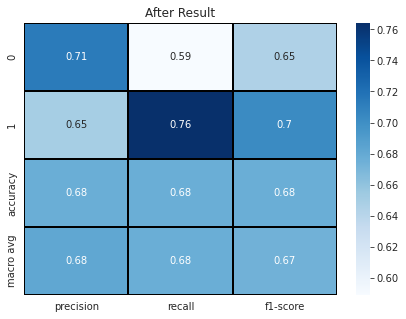

In [ ]:
# Visualizing evaluation Metric Score chart
result_5 = pd.DataFrame(classification_report(y_pred=xgb_y_pred, y_true=y_smote, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_5.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb = XGBRFClassifier()

# GridSearch to find the best parameters
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}
xgb_cv= GridSearchCV(xgb, param_grid = grid, scoring = scoring, cv=5)

# Fit the Algorithm
xgb_cv.fit(x_smote, y_smote)
# Predict on the model
xgb_cv_y_pred = xgb_cv.predict(x_smote)
xgb_cv_y_pred_proba = xgb_cv.predict_proba(x_smote)[:,1]

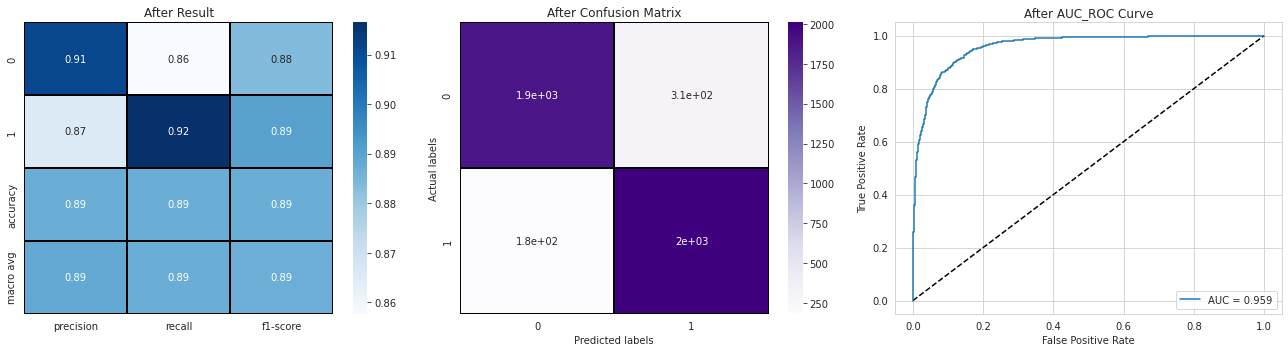

In [ ]:
# Visualizing evaluation Metric Score chart
result_6= pd.DataFrame(classification_report(y_pred=xgb_cv_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, xgb_cv_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_6.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=xgb_cv_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Answer Here - GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here - Answer Here - Improvement has been observed after cross validation.

Before f1 score: 0.67

After f1 score: 0.89

### ML Model - 5

In [ ]:
# ML Model - 1 Implementation
rfc = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rfc.fit(x_smote, y_smote)
# Predict on the model
rfc_y_pred = rfc.predict(x_smote)
rfc_y_pred_proba = rfc.predict_proba(x_smote)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

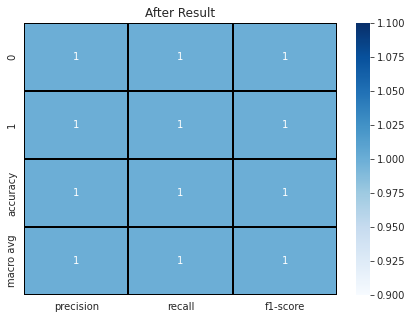

In [ ]:
# Visualizing evaluation Metric Score chart
result_7 = pd.DataFrame(classification_report(y_pred=rfc_y_pred, y_true=y_smote, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_7.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_cv = RandomForestClassifier(random_state=2)

# GridSearch to find the best parameters
grid = {'n_estimators' : [100,300],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}
rfc_grid = GridSearchCV(rfc_cv, param_grid = grid, scoring = scoring, cv=5)
# Fit the Algorithm
rfc_grid.fit(x_smote, y_smote)
best_model = rfc_grid.best_estimator_

# Predict on the model
rfc_cv_y_pred = best_model.predict(x_smote)
rfc_cv_y_pred_proba = best_model.predict_proba(x_smote)[:,1]

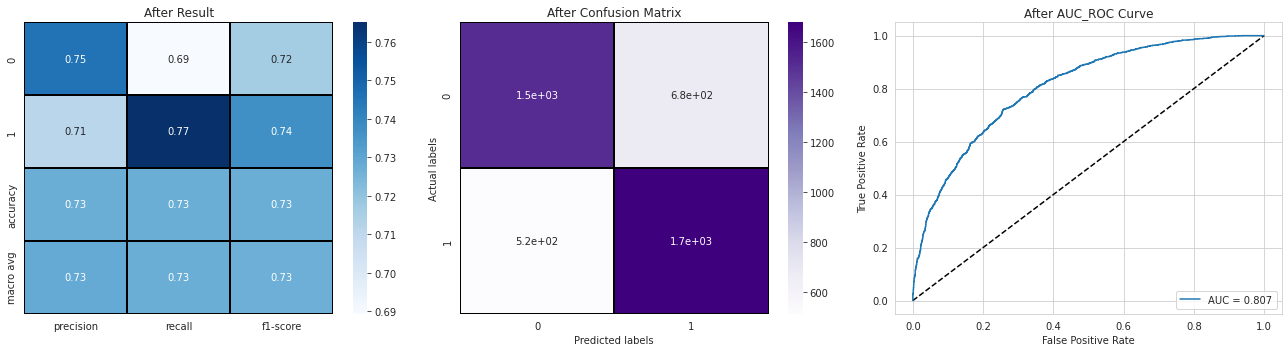

In [ ]:
# Visualizing evaluation Metric Score chart
result_8= pd.DataFrame(classification_report(y_pred=rfc_cv_y_pred, y_true=y_smote, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_smote, rfc_cv_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_8.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_smote, y_pred=rfc_cv_y_pred), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Answer Here - GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here - After cross validation scores decreased instead

Before f1 score: 1.0

After f1 score: 0.73

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here - In our case f1 score and recall have been selected as evaluation metric as the data being highly imbalanced gives false accuracy, f1 score gives the average of recall and precision. since in case of cardiovascular diseases we cannot afford to have false negative case (risky) so for positive businesss impact we consider recall as evaluation metric.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here - Out of 5 algorithms K-Nearest Neighbours gave best f1 and recall scores  both before and after crossvalidation, therefore KNN is the best model so far and can be used for model training.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

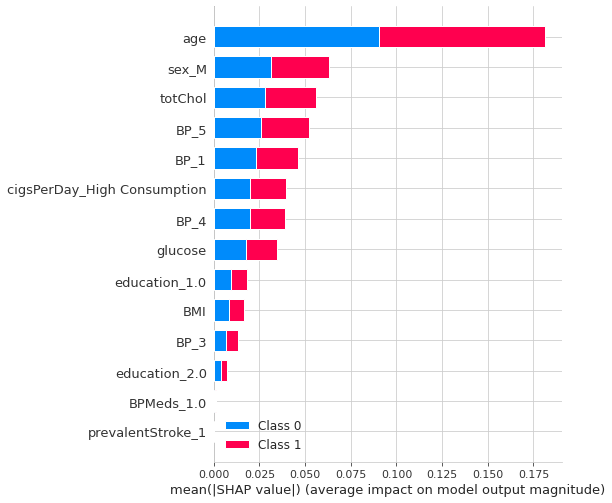

In [ ]:
# Creating instances of shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_smote)
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(x_smote, columns =['age','totChol','BMI','glucose','education_1.0','education_2.0',
                                          'cigsPerDay_High Consumption','sex_M','BPMeds_1.0','prevalentStroke_1','BP_1','BP_3','BP_4','BP_5'])
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

Answer Here - Feature importance is not defined for the KNN Classification algorithm. There is no easy way to compute the features responsible for a classification here. Therefore we will be using random forest as the second best model to show feature importance.Random forest has pretty decent scores and can be used for model training, we have used shap as model explainability tool. 

Insights:- As we can observe that Age is affecting depenent variable the most, followed by sex, total cholestrol and BP_5 and BP_1 and cigsPerDay_High Consumption (in that order) rest all are affecting less in deciding the accuracy of RandomForest Model.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
filename='cardiovascular_risk_prediction'
pickle.dump(knn,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.fit(x_smote,y_smote)
loaded_model.predict(x_smote)

array([0, 0, 0, ..., 1, 1, 1])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## EDA :- 
*  Our data set has 17 features & 3390 rows. We studied all these features and have drawn following comclusions:
 
  * The very first graphs gives us the distribution of dependent variable and whch shows that very less no of peoples are prone to cardiovascular risk.
  * Inferences drawn  from Countplots of the numerical features were; 
  
>>>>| Field | Normal range |
|-------|-------------|
|Total cholestrol|< 200 mg/dL|
|Normal BP|120/80 mmHg|
|BMI|18.5 to 25|
|Heartrate|70-80 bpm|
|Glucose|100|

  * Any value outiside the given normal range determines higher risk of cardiovascular risk. Thus, various companies like insurance, healthcare, fitness-nutrition and medical can target this population for better revenue generation.

  * We have observed that people wether or not smoking are at equal risk of cardio vascular diseases, which suggests companies to target them equally.
  * Our data shows that people having hypertension are more prone to cardio vascular diseases, very less no. of paitents are on BpMeds, but 50 % of then are at cardiovascular risk, which is significant. Thus, this information can be leveraged by various companies. 
  * Distribution of cardiovascular Risk and Age shows that with increase in age chances of having cardiovascular diseases increases.
  * Diabetic patients are high risk of getting cardio vascular disease as our data shows; ~ 61% of the diabetic population is at high risk.
  * Gender distribution shows that males are more prone to cardio vascular risk as compared to females because the frequency of males having smoking habits is more.
  * Another bivariate plot between Systolic and diastolic BP shows that they are positivly correalted and with increase in any of this values increses the ridk of cardiovascular diseases.
  * Orderwise correaltion shows that age and systolic pressure highly affect our dependent variable.


## Model Training :-

* Our dependent variable is "TenyearCHD" which determines, people having cardiovascular issue in ten years of span.
* We tried 5 different algorithms for model training namely, logistic regression, KNN, Naive-Bayes, XGBclassifier, RandomForestClassifier.
* Evalution metrics for this project were f1 score and recall, as our data was highly imbalance it would have given us false accuracy, f1 which is the averge of presicion and recall might give us better predictions than accuracy. In our case no of False negatives can have a huge bussiness cost, therefore, instead of precision recall is the more appropiate metrics for evalution. 
* Out of all the five algorithms KNN was found to be more efficient for model training as it has 0.98 F1 score
* So we tried setting an optimum hyperparameter to prevent overfitting of the model. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***